this imports a lot of data and makes a scaterplot def 

In [30]:
#plots.py
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    plot_vars = list(df.keys())
    for var1 in plot_vars:
        for var2 in plot_vars:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

this imports the files from the last code and plots it by createing a script that imports data from fred

In [31]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

gathers data of money in circulation from fred and the datlib

In [32]:
#fedProject.py
from datlib.stats import *
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Base: Total": "BOGMBASEW",
               "Base: Currency in Circulation": "MBCURRCIRW"}
# Select start and end dates
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

displays data gatherd above in chronological order

In [33]:
data.iloc[:15]

Base: Total  Base: Currency in Circulation
DATE                                                  
1975-01-31    107789.25                       77860.50
1975-02-28    105592.00                       77009.50
1975-03-31    105505.25                       77693.25
1975-04-30    106762.00                       78466.60
1975-05-31    106920.75                       79176.50
1975-06-30    108131.25                       80603.00
1975-07-31    109537.80                       81756.00
1975-08-31    109065.25                       81911.25
1975-09-30    109155.25                       82097.75
1975-10-31    109605.80                       82204.00
1975-11-30    110874.75                       83648.00
1975-12-31    113010.80                       85783.60
1976-01-31    112082.25                       84889.25
1976-02-29    110543.50                       83992.00
1976-03-31    111178.20                       84855.20

this code converts units to millions from billions

In [34]:
#FRED.py
#. . . 
def bil_to_mil(series):
    return series* 10**3

this code transforms data in the total reserves and other deposits from billions to millions

In [35]:
#fedProject.py
# . . .
data_codes  = {"Base: Total ($ Mil)": "BOGMBASEW",
               "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
               
# Select start and end dates
start = datetime.datetime(2002, 12, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")
bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

displays data from last code in chronological order in millions of dollars

In [7]:
data

Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2002-12-31            697517.00                              676472.50   
2003-01-31            700446.80                              679511.20   
2003-02-28            700362.25                              679723.75   
2003-03-31            704898.00                              683568.25   
2003-04-30            709173.00                              686919.20   
...                         ...                                    ...   
2020-05-31           5139460.00                             1928941.25   
2020-06-30           5059368.25                             1955540.75   
2020-07-31           4725875.20                             1977793.40   
2020-08-31           4790990.00                             2004558.50   
2020-09-30           4876690.00                             2022000.00   

            Balance Sheet: Total Assets ($ Mil)  \
DATE                                              
2002-12-31                            725800.50   
2003-01-31                            724718.40   
2003-02-28                            721326.00   
2003-03-31                            723651.25   
2003-04-30                            736926.40   
...                                         ...   
2020-05-31                           6947555.25   
2020-06-30                           7127786.25   
2020-07-31                           6960429.40   
2020-08-31                           6975892.25   
2020-09-30                           7048374.20   

            Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)  \
DATE                                                                        
2002-12-31                                          672844.50               
2003-01-31                                          671196.20               
2003-02-28                                          668666.25               
2003-03-31                                          672446.00               
2003-04-30                                          685518.60               
...                                                       ...               
2020-05-31                                         6413832.00               
2020-06-30                                         6582068.00               
2020-07-31                                         6606989.60               
2020-08-31                                         6685136.00               
2020-09-30                                         6802569.00               

            Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2020-05-31                                       5843195.25   
2020-06-30                                       6048567.25   
2020-07-31                                       6188826.40   
2020-08-31                                       6283343.50   
2020-09-30                                       6397502.00   

            Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2020-05-31         

makes the plotline function for later use

In [36]:
#plots.py
# . . .
def plot_lines(df, linewidth = 1, figsize = (40,20), pp = None):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([int(x) for x in vals]) 
    
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    plt.savefig(filename[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

plots the variables associated with balance sheet

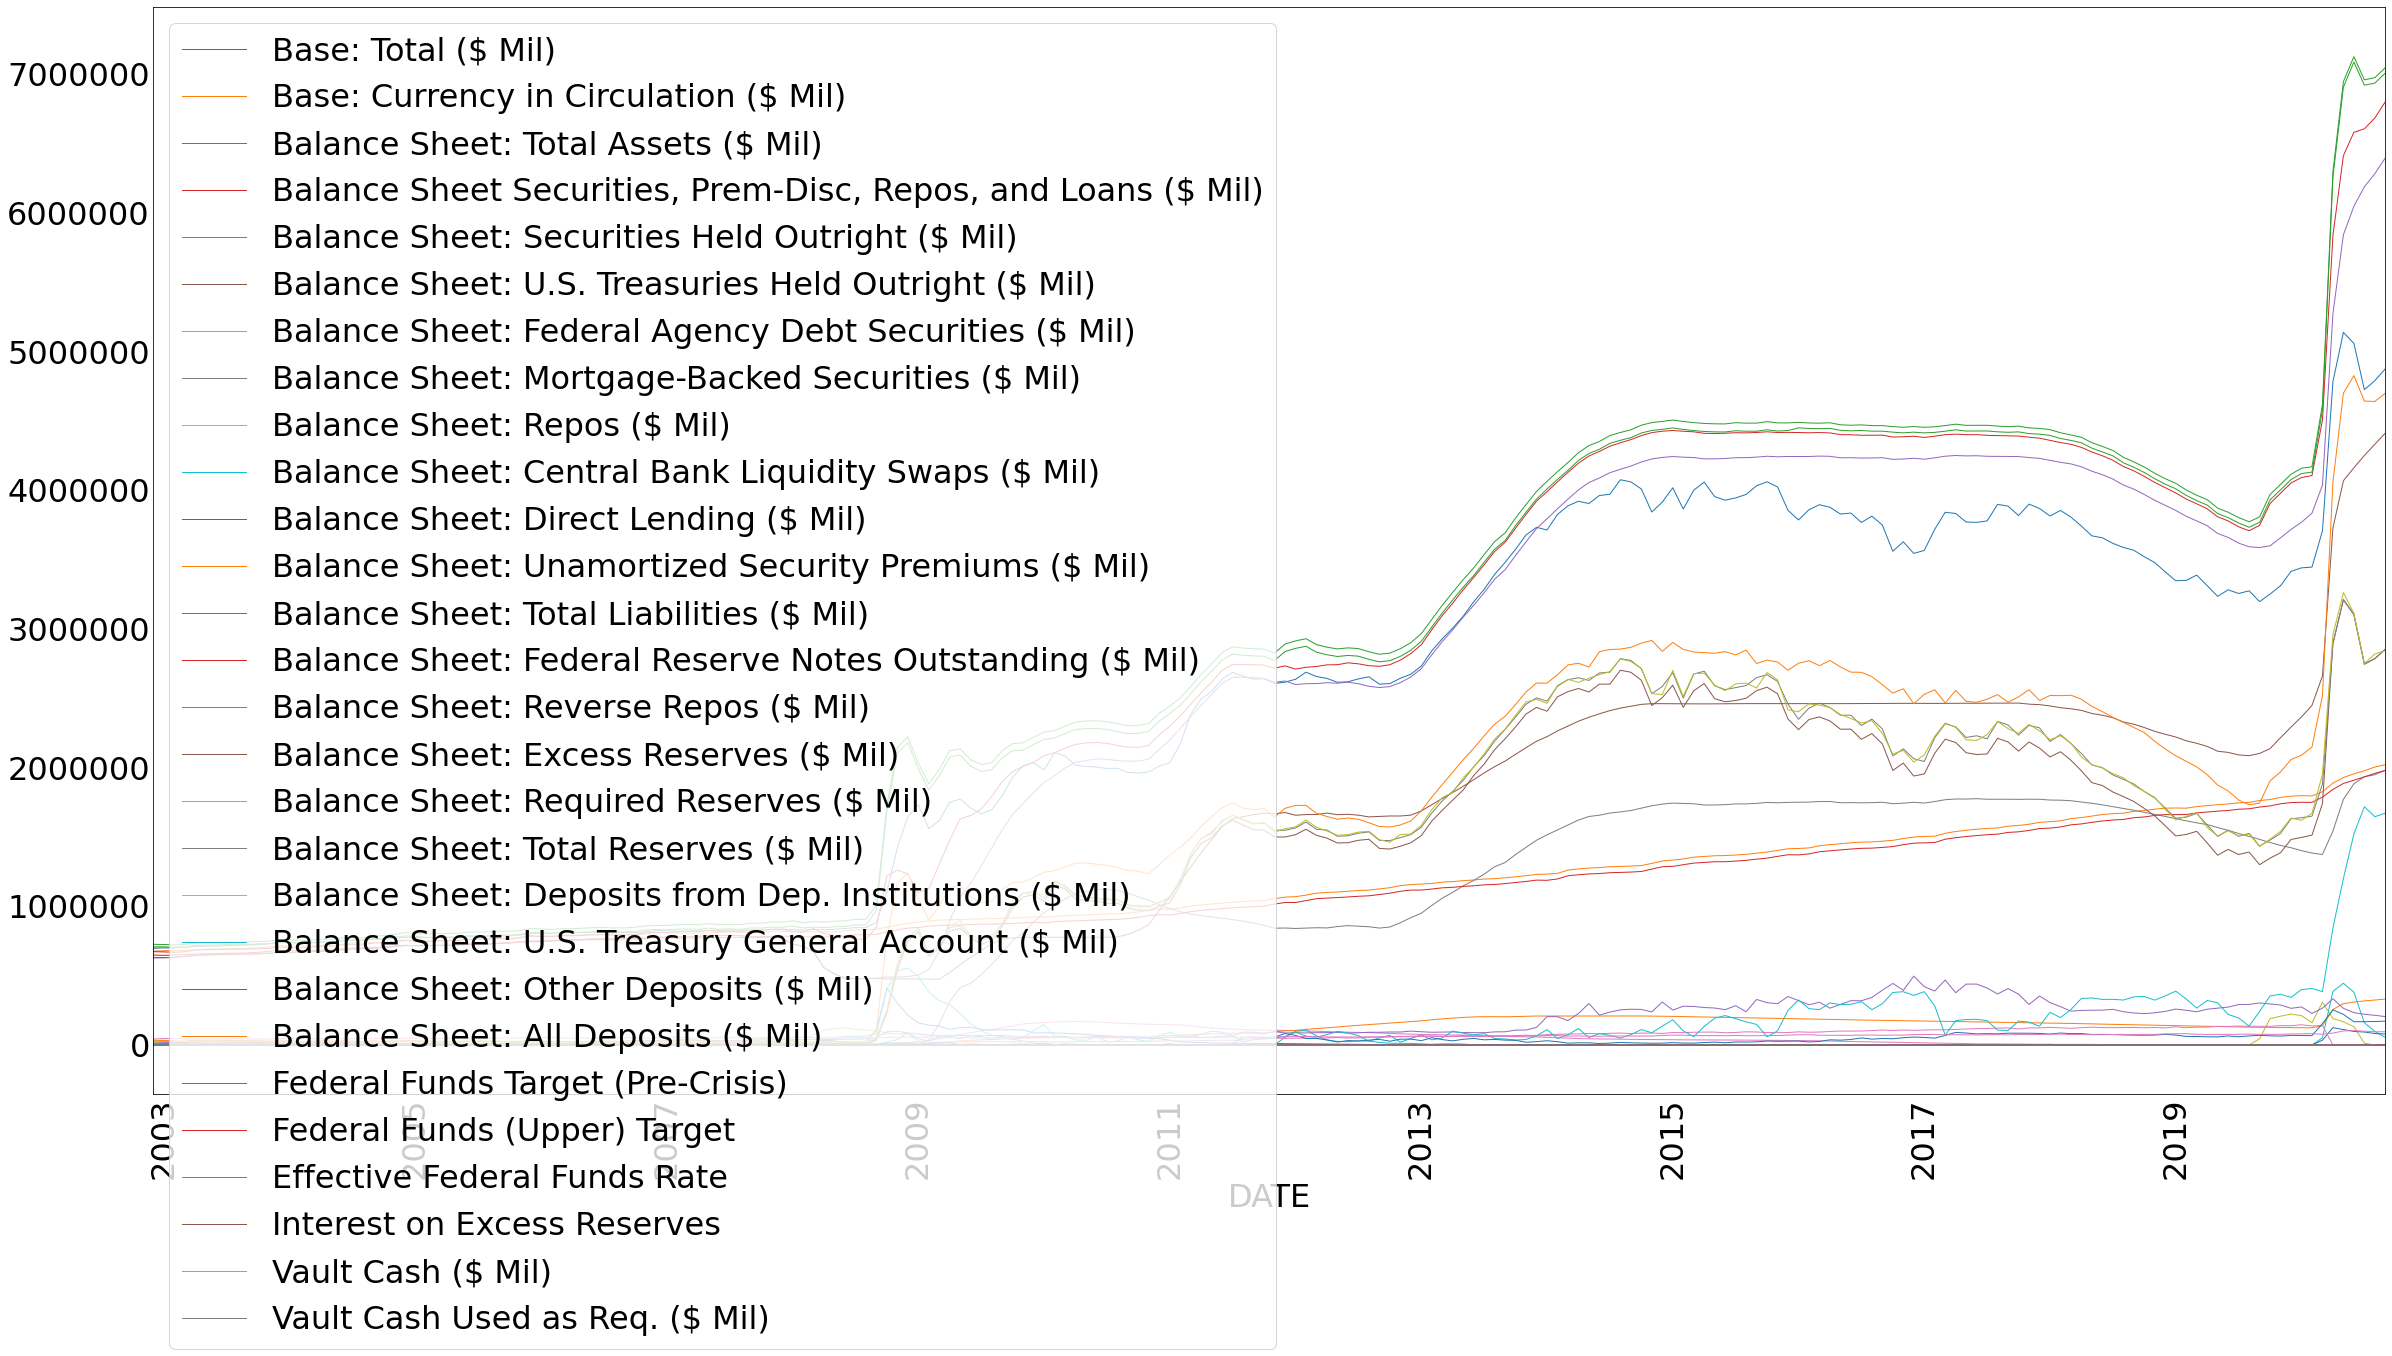

In [37]:
#fedProject.py
#. . . 
plot_lines(df = data, linewidth = 1, figsize = (40, 20), pp = None)

this code makes the graph focuses in on 2 variable instead of all of them

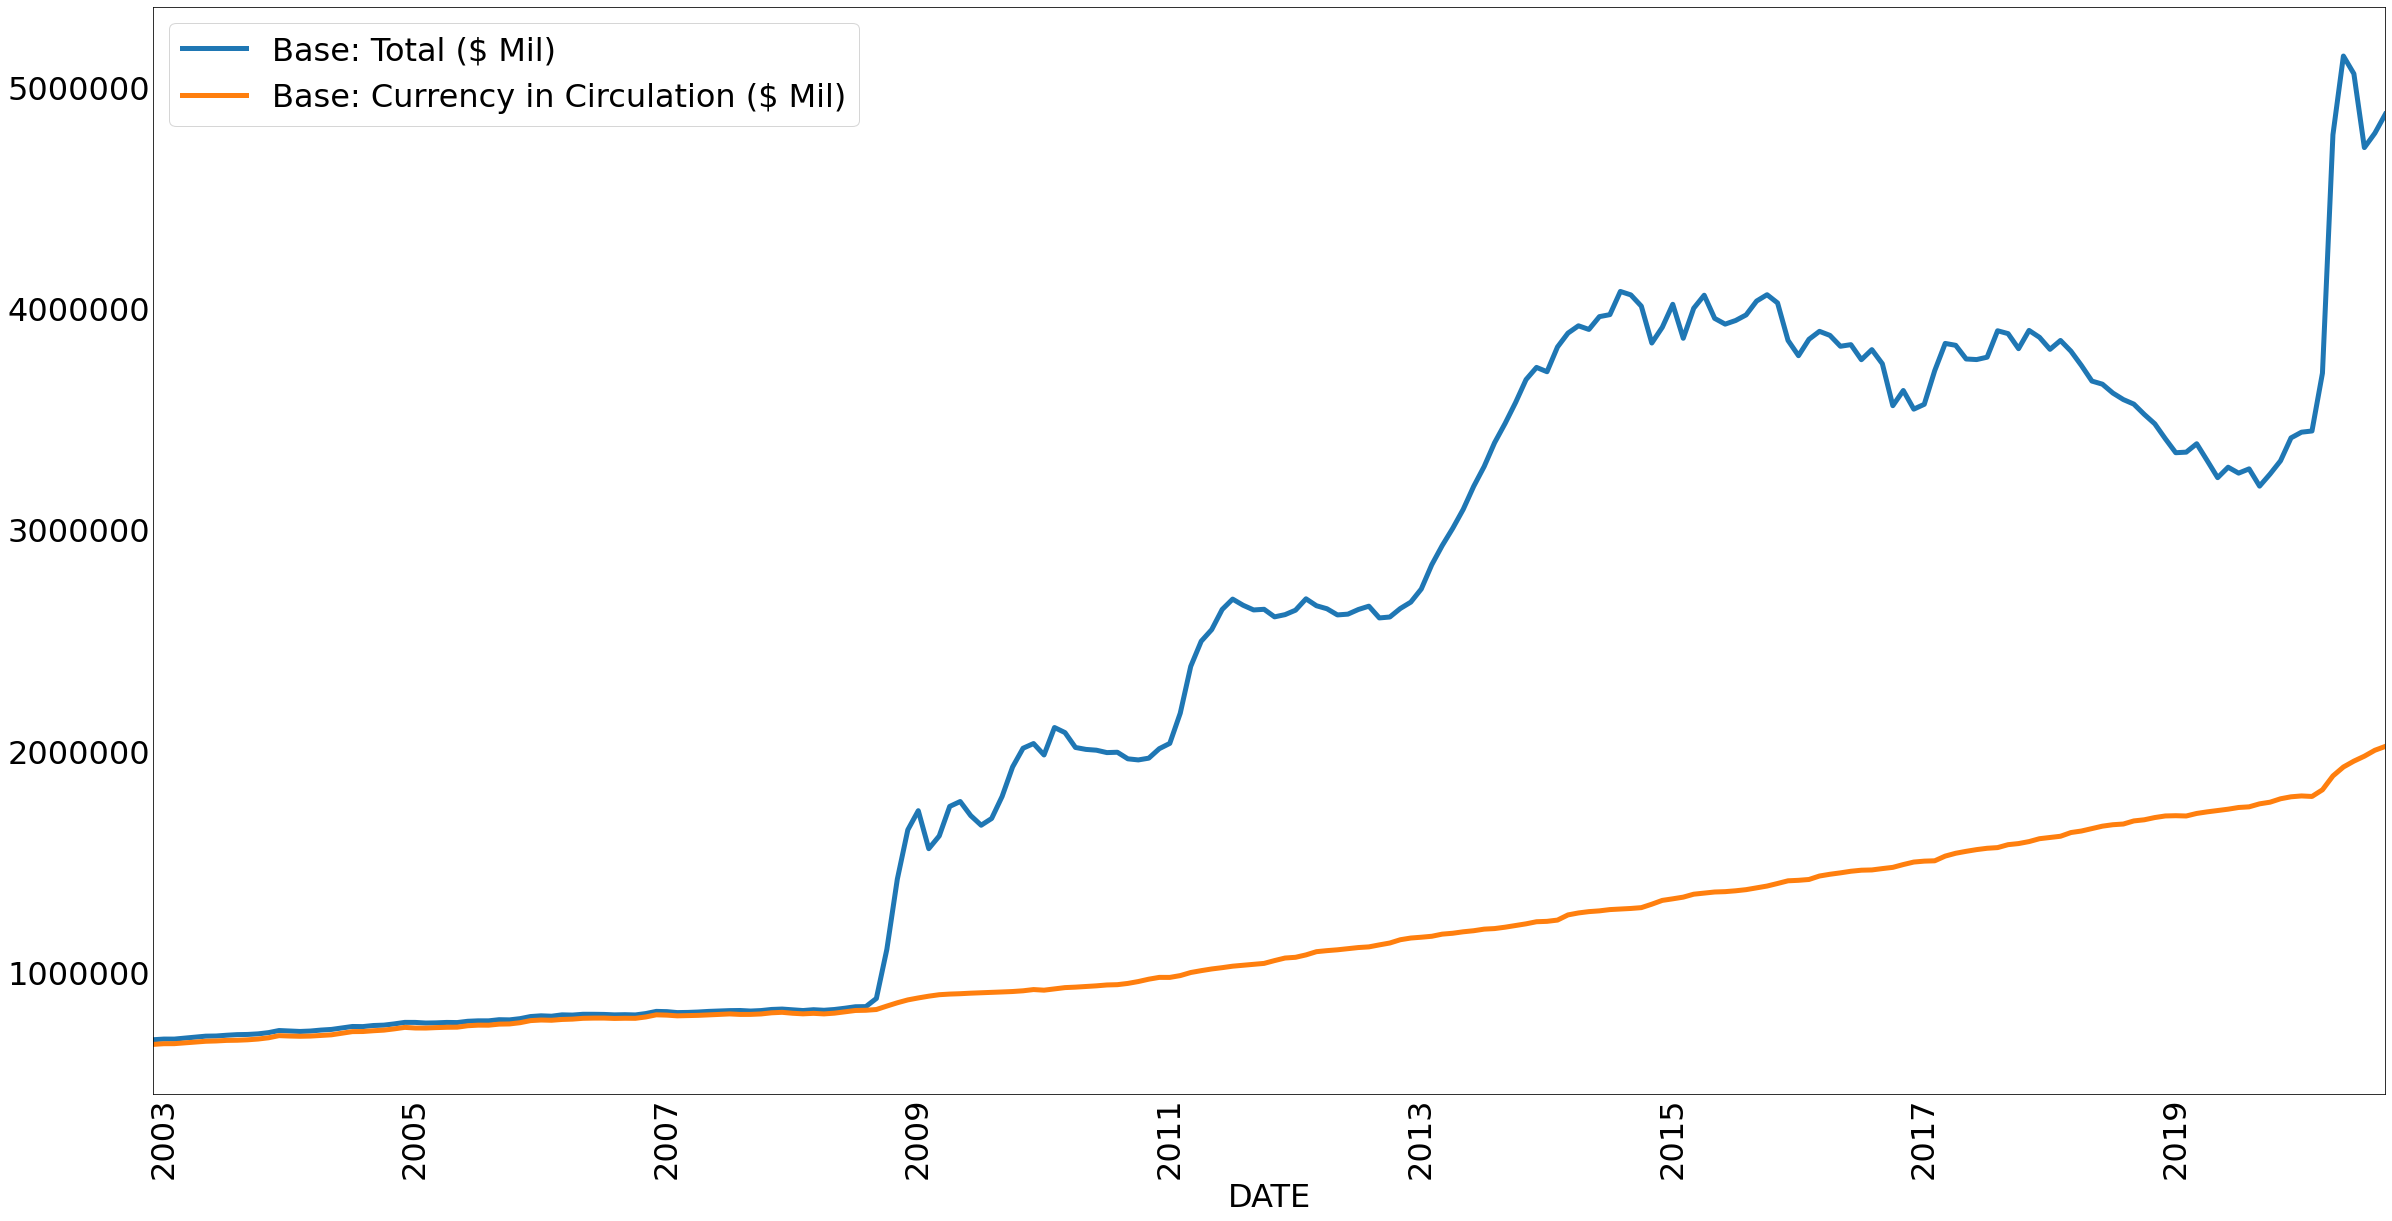

In [38]:
#fedProject.py
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)


this adds the "balance sheet: excess reserves ($mil)" to the graph

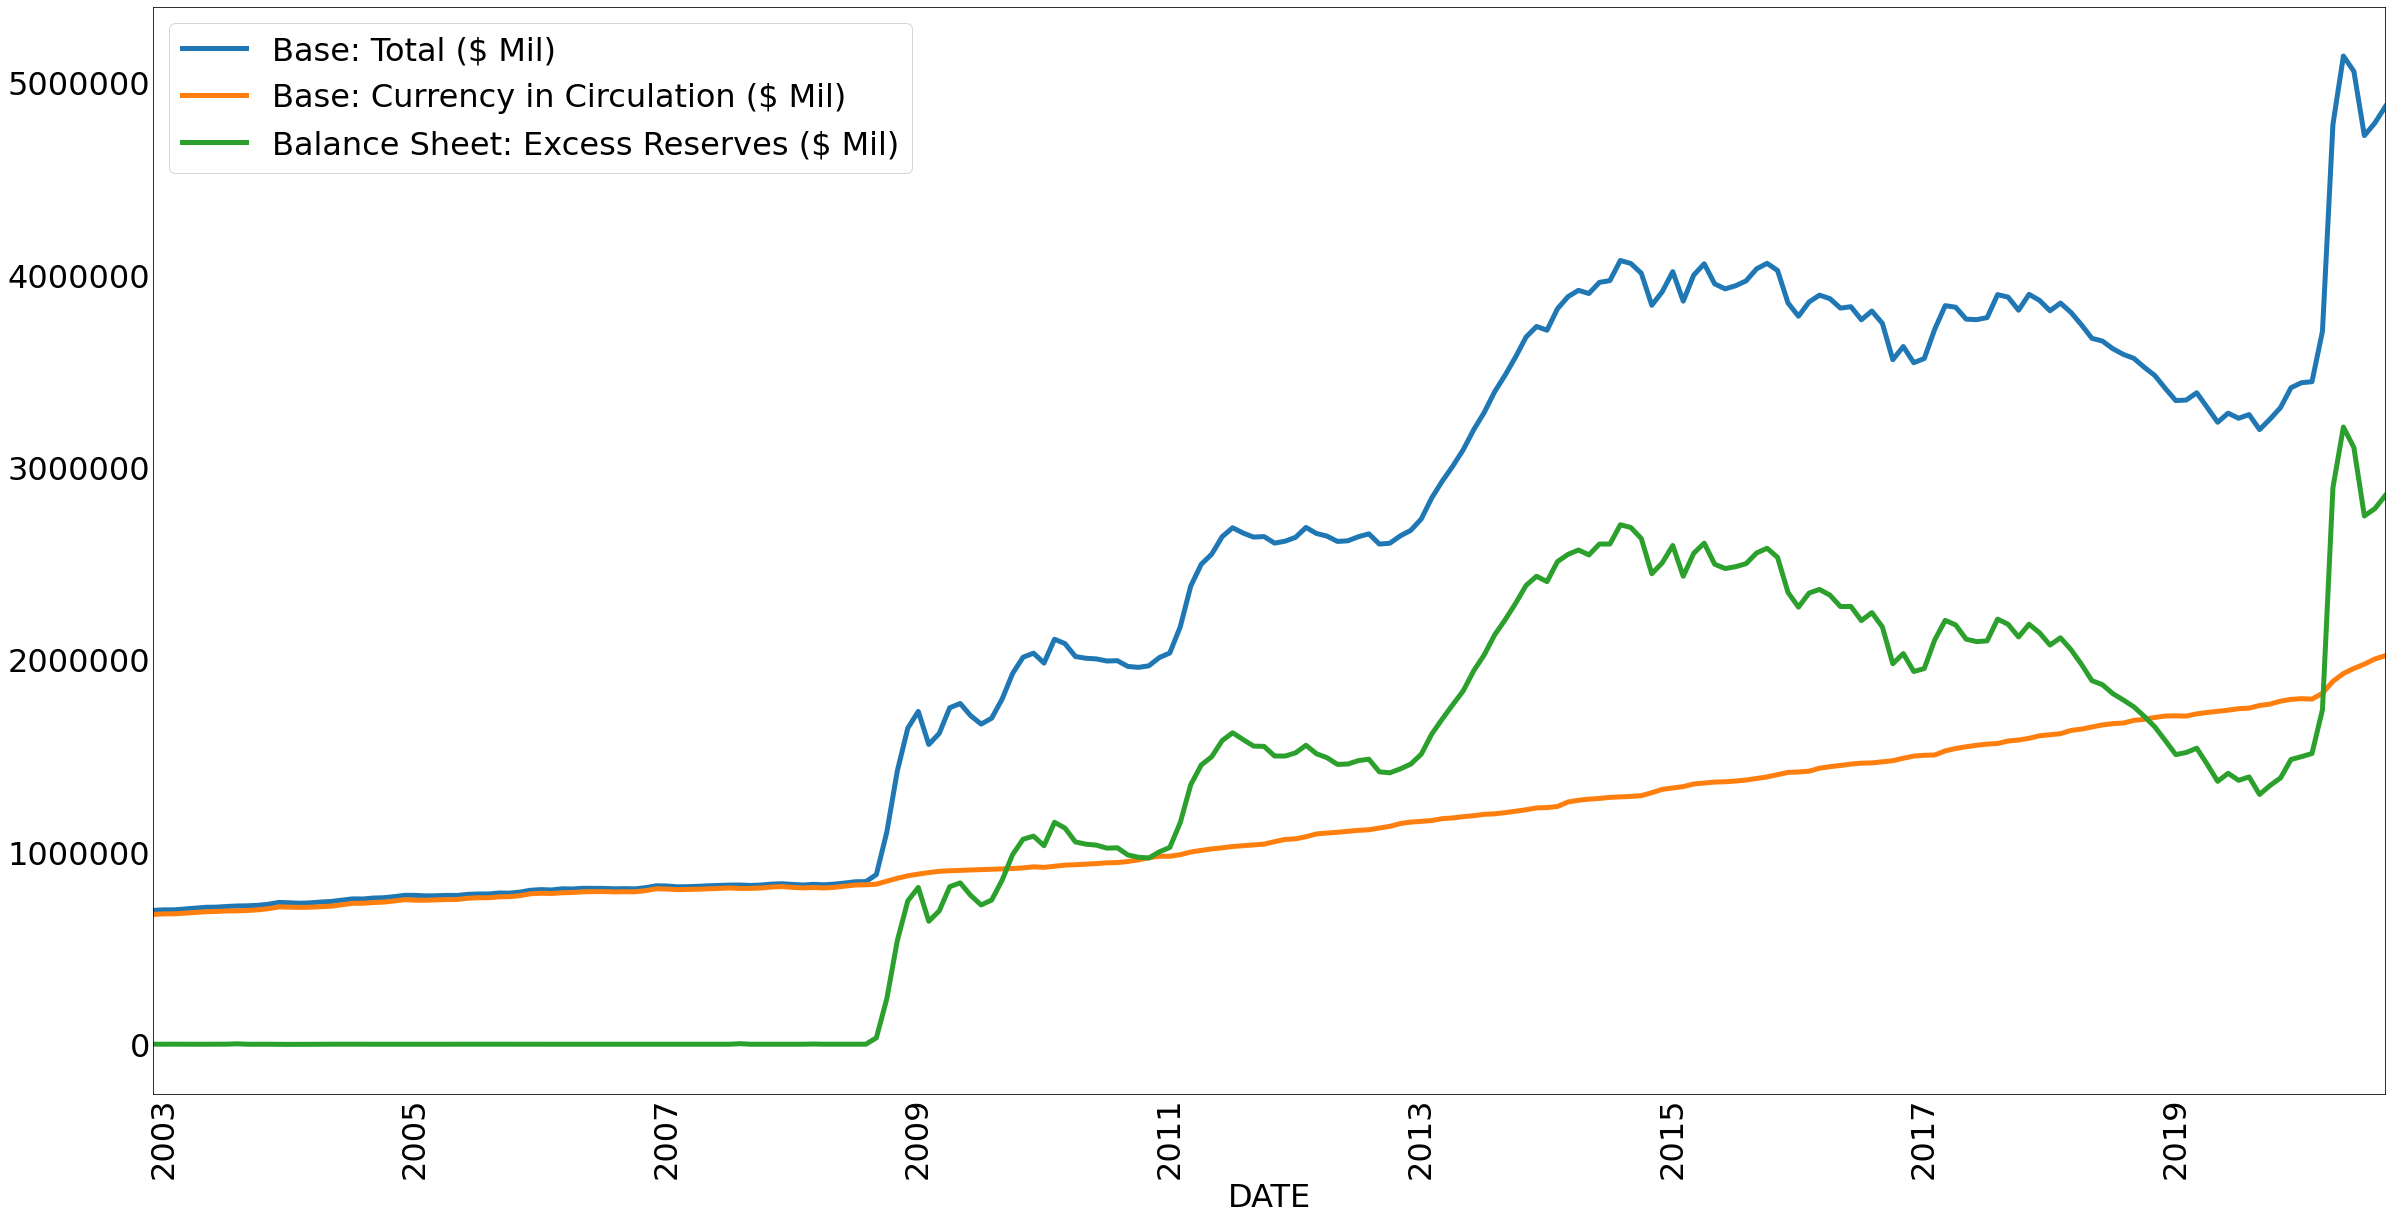

In [11]:
#fedProject.py
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)

this creates a stacked plott lines function

In [39]:
#plots.py
# . . .
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), 
                       pp = None, total_var = False, title = False):
    fig, ax = plt.subplots(figsize = figsize)
#    mpl_colors = ["C" + str(i) for i in range(11)]
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    # change y vals from mil to tril
    y_vals = ax.get_yticks()
    ax.set_yticklabels(int(val / 10 ** 6) for val in y_vals)
    ax.set_ylabel("$ Trillion")
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "k",
              label = total_var, ls = "--")
    if title != False:
        plt.title(title)
    ax.legend(loc=2, ncol = 2)

creates a plots stacked lines graph 

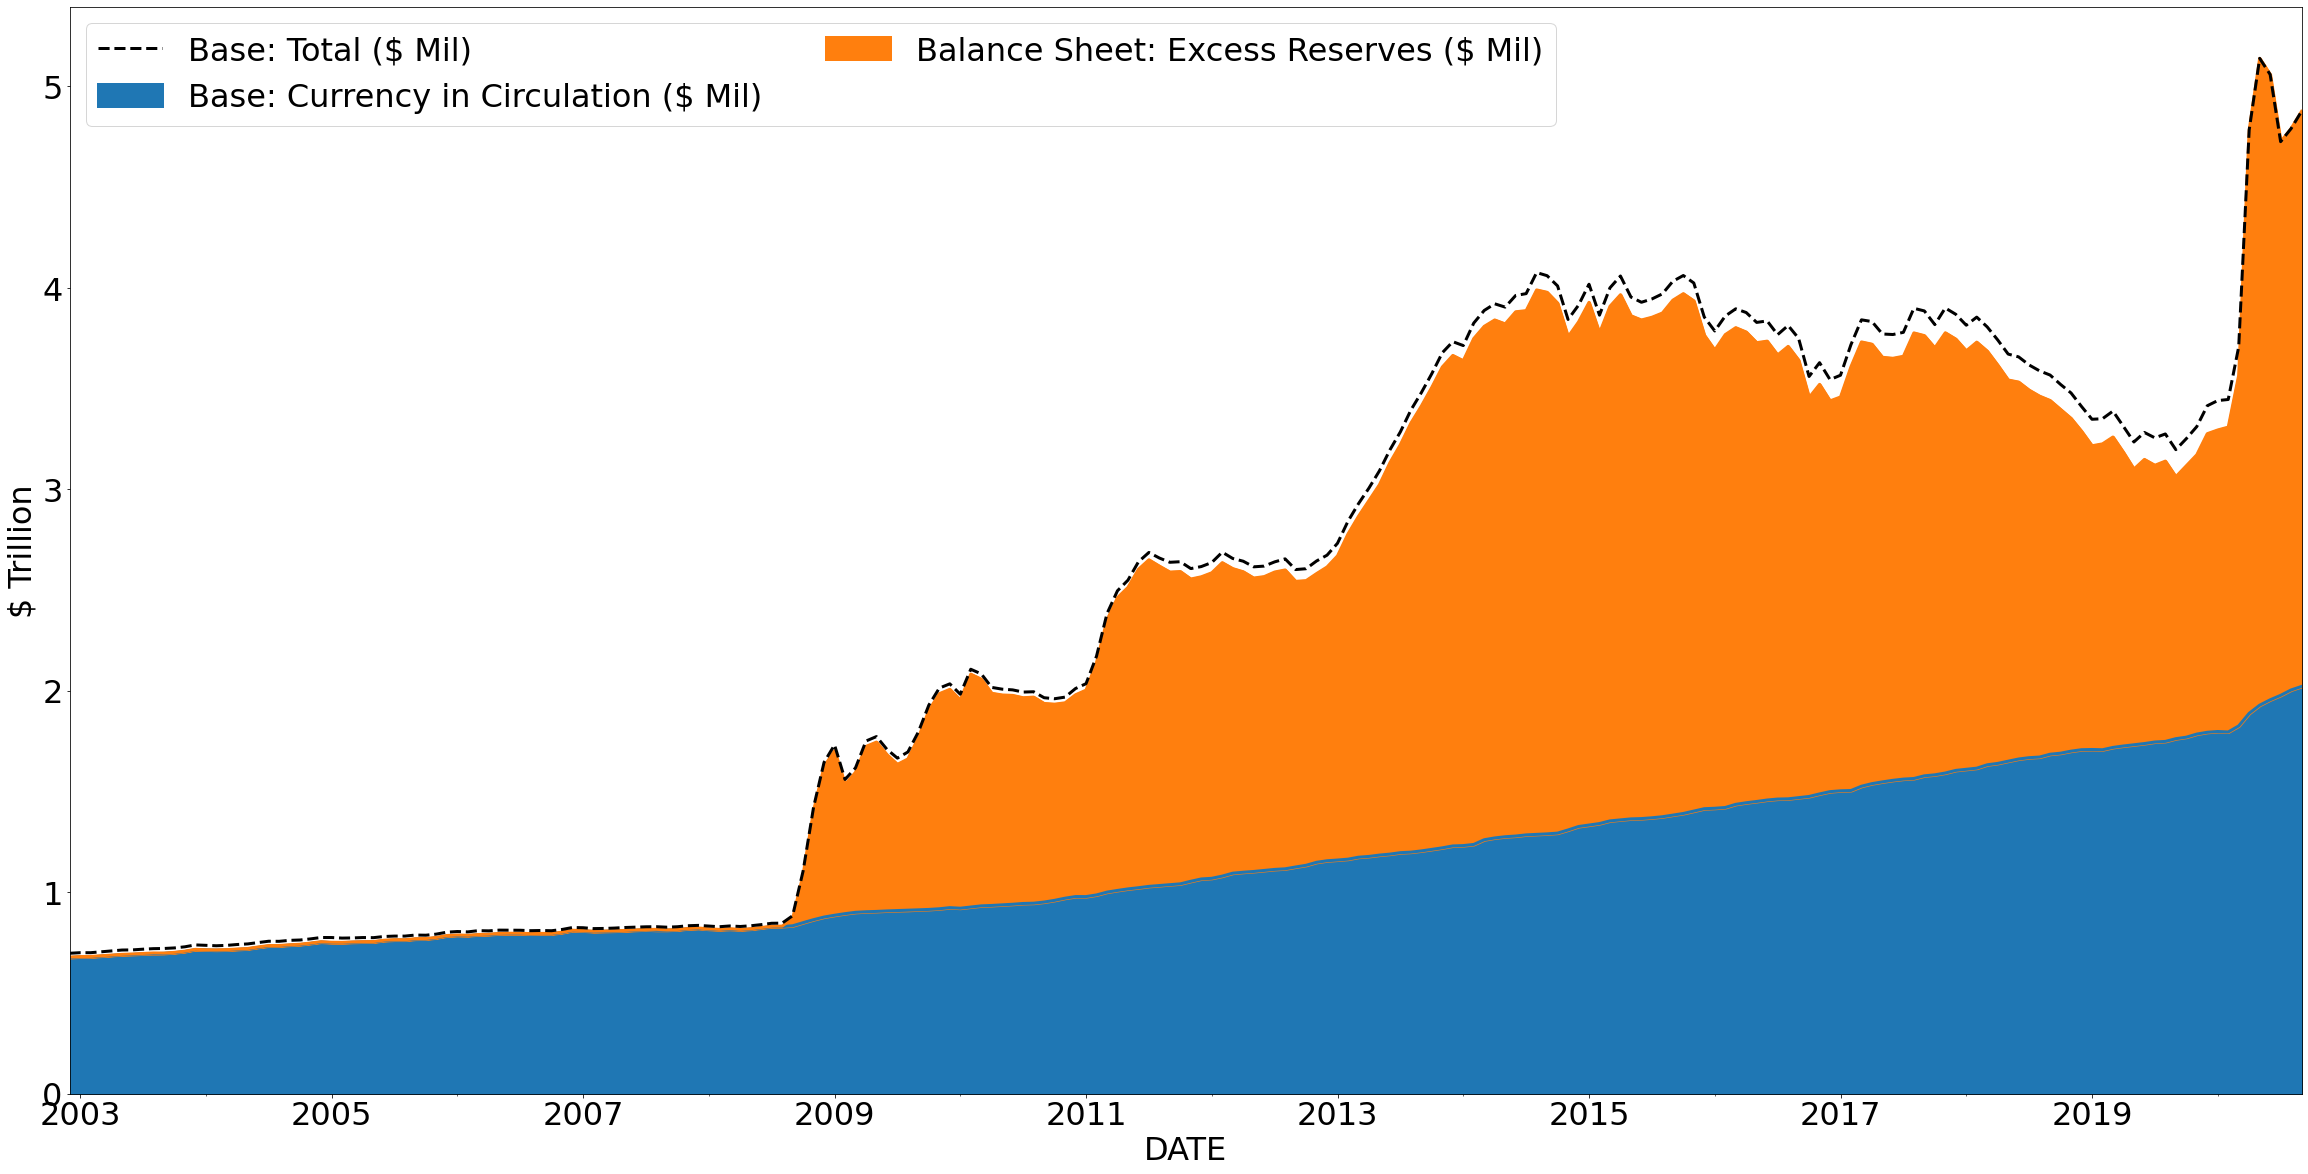

In [40]:
#fedProject
# . . . 
money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

this adds required reserves in mil to the graph

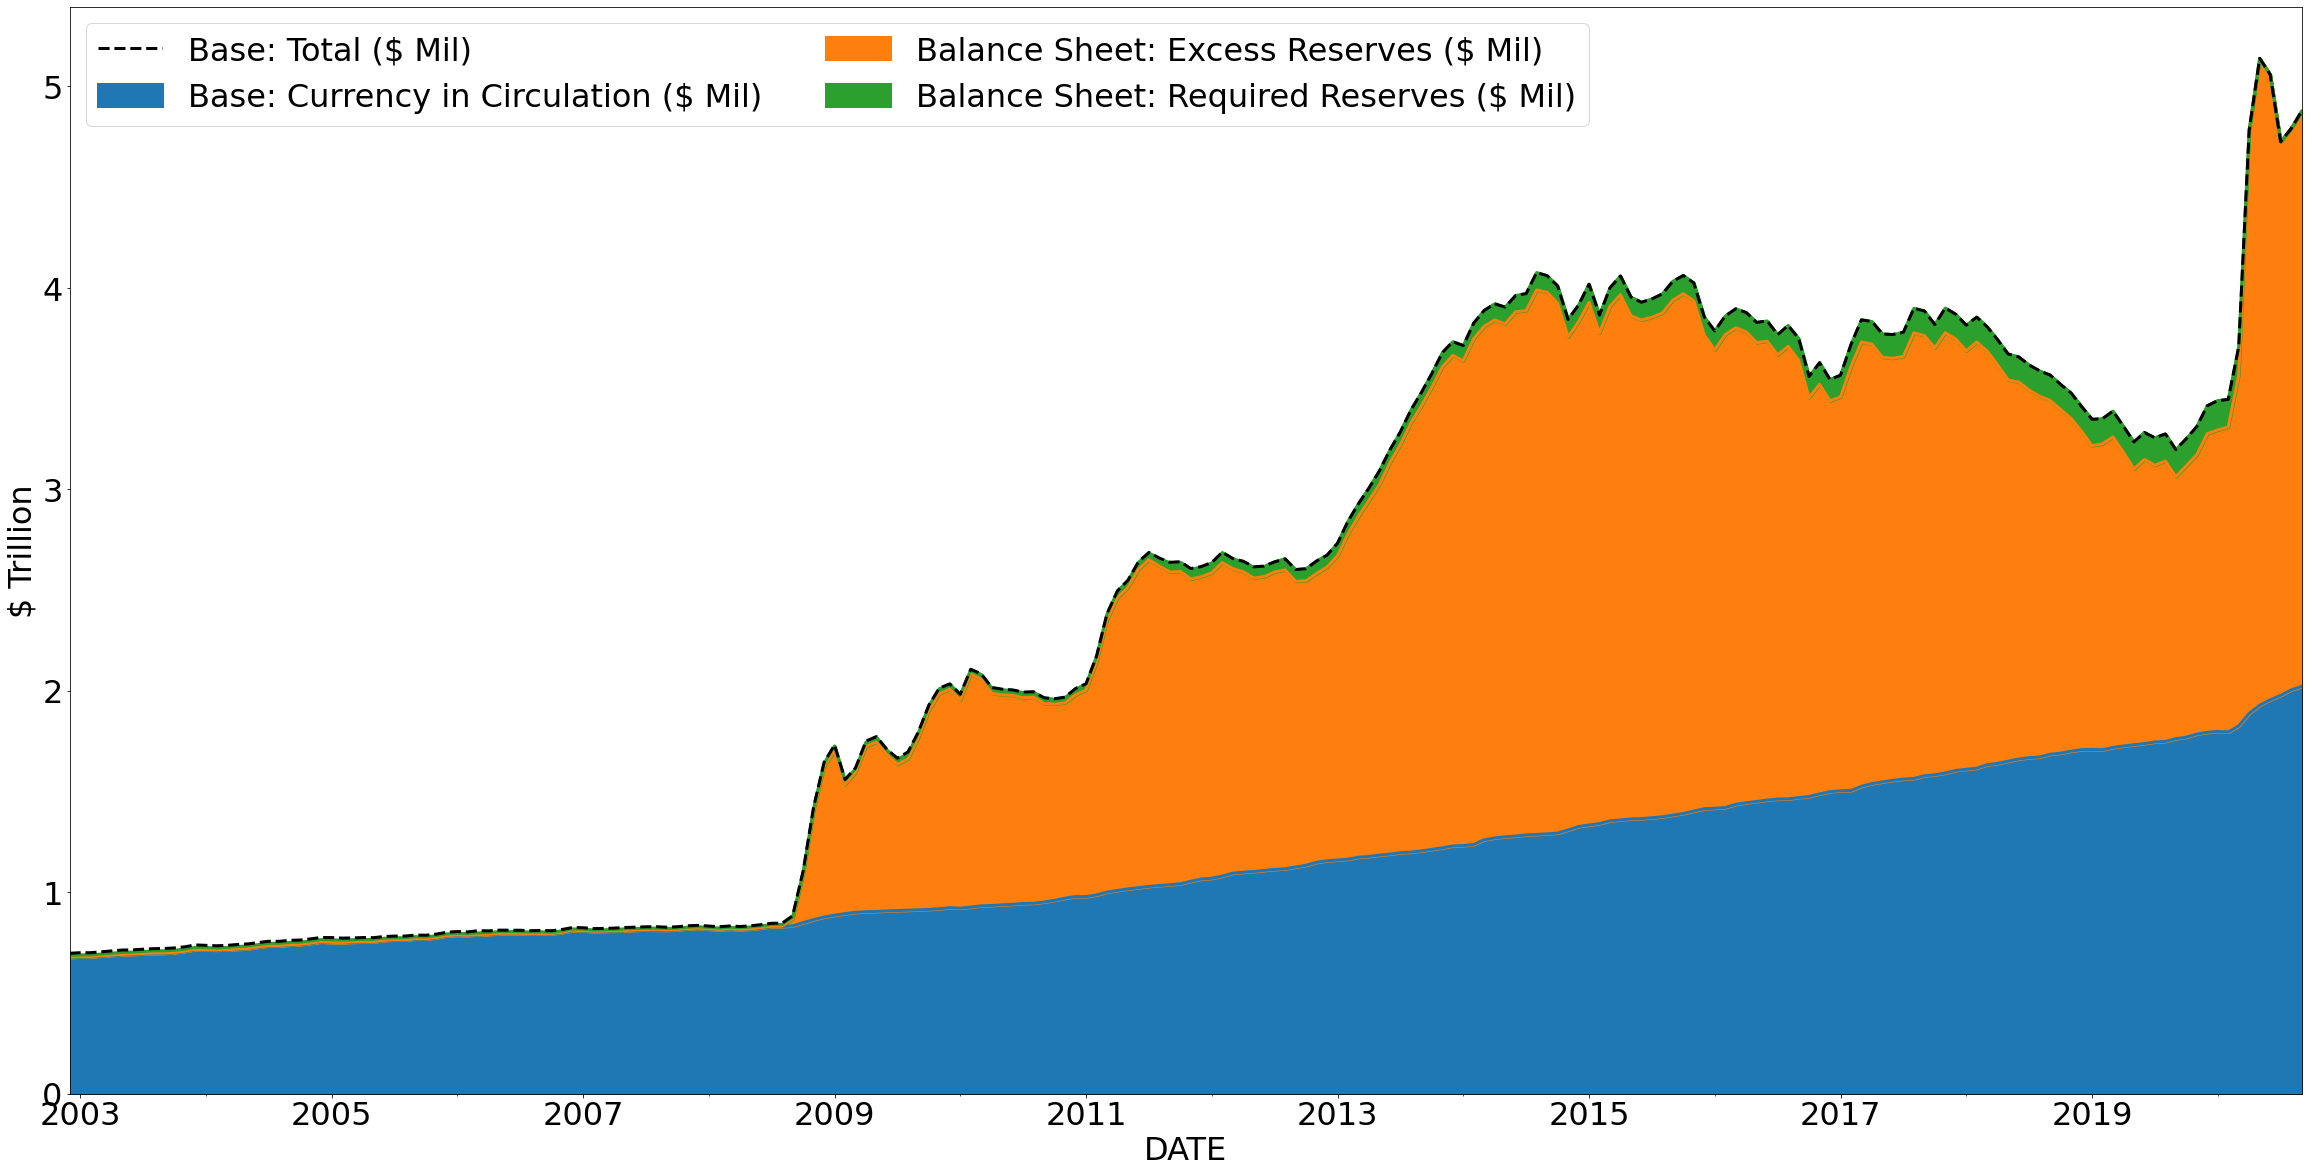

In [14]:
reserve_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Required Reserves ($ Mil)"]
plot_stacked_lines(data, reserve_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")


this graph shows the total reserves vs the vult cash

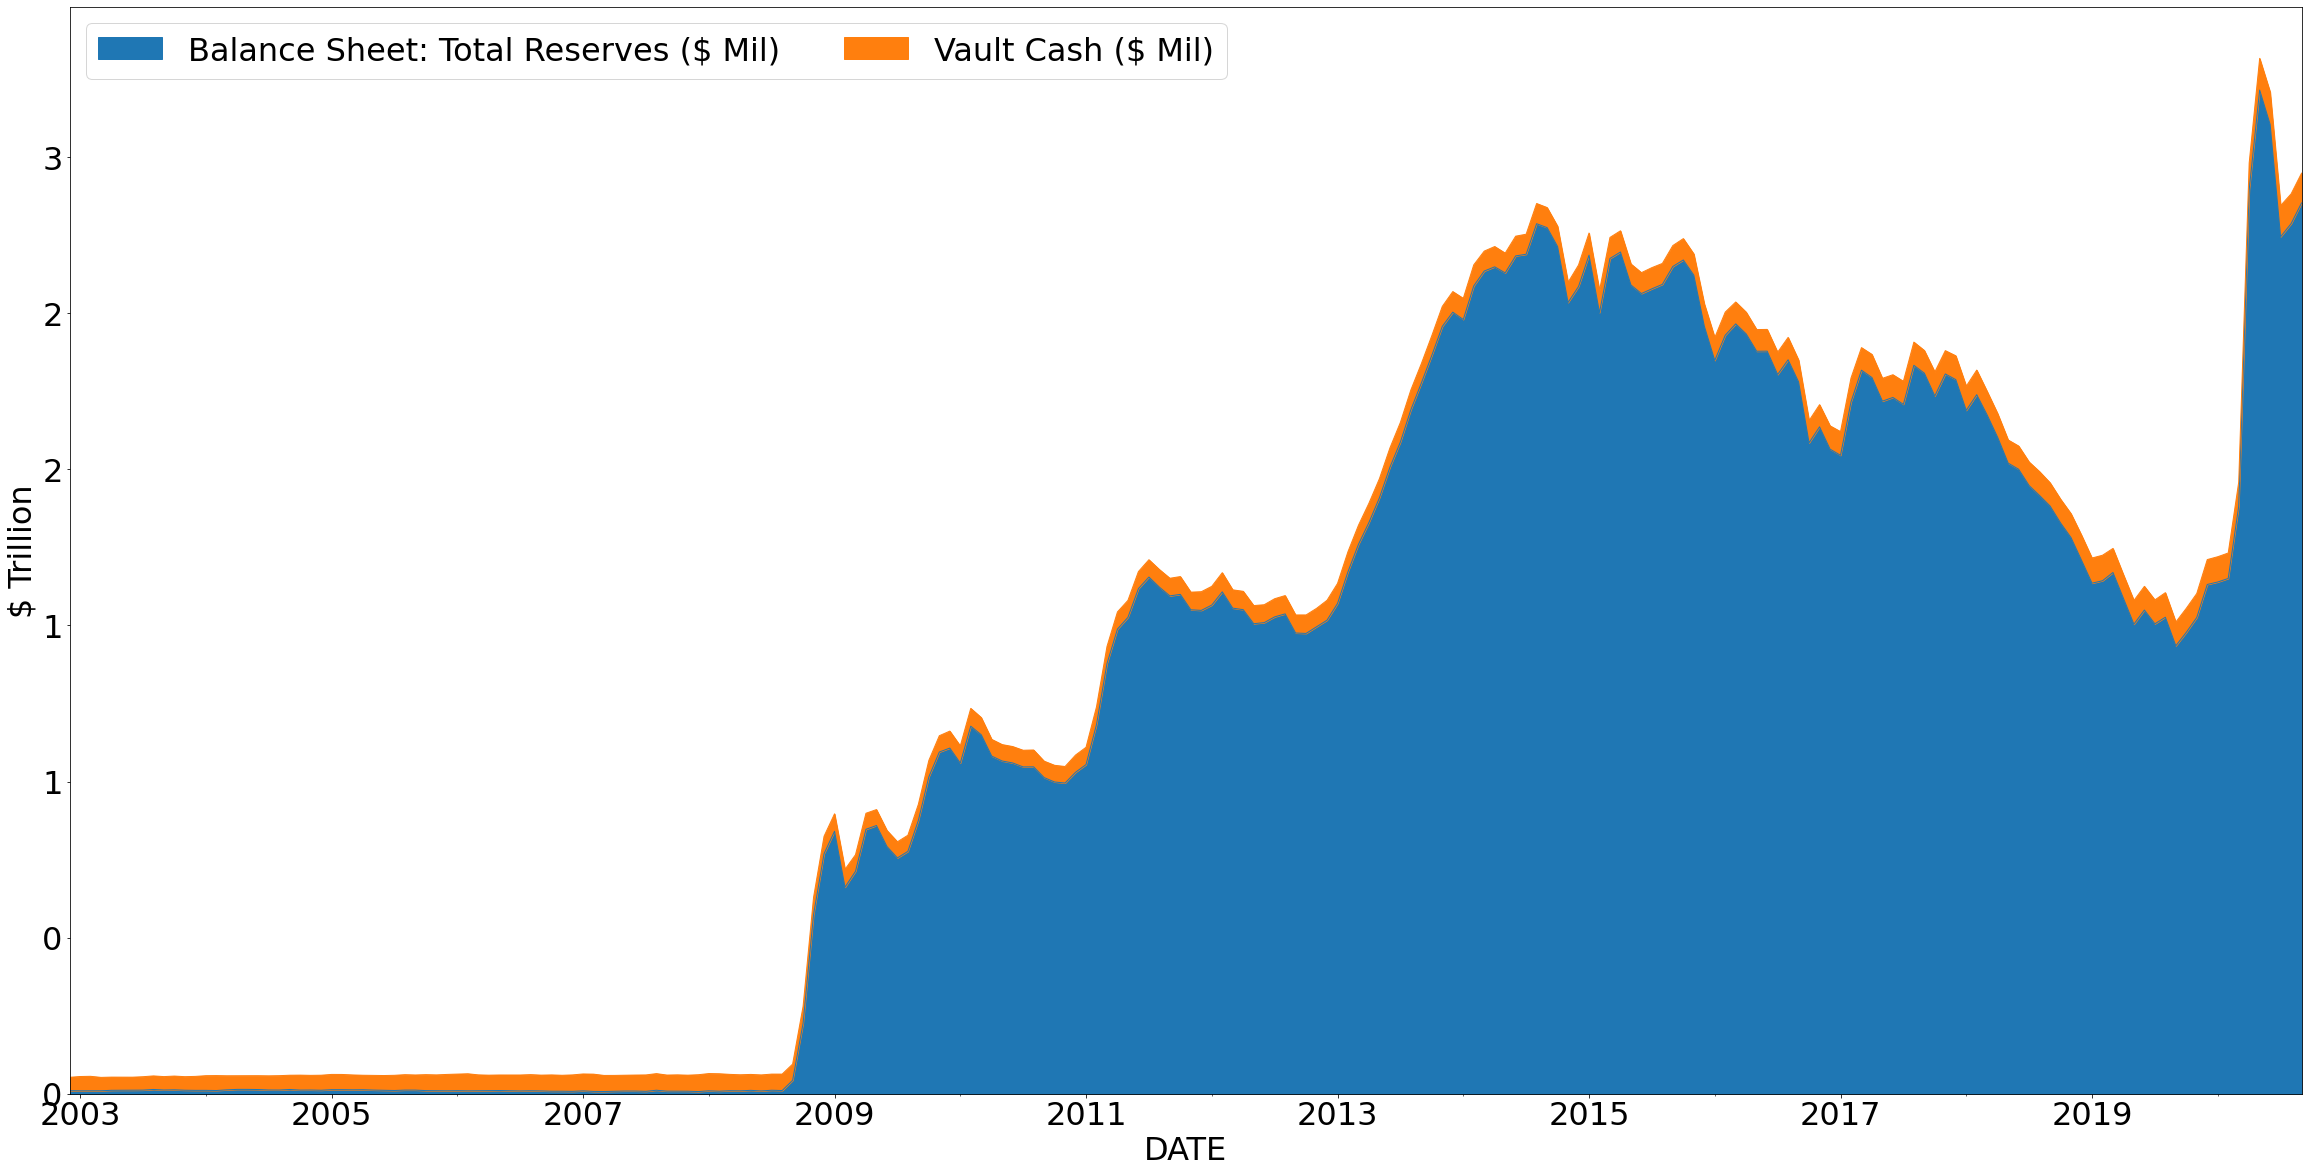

In [15]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Vault Cash ($ Mil)"]
plot_stacked_lines(data, reserve_vars)


this shows more differences between required and exces reserves in each category

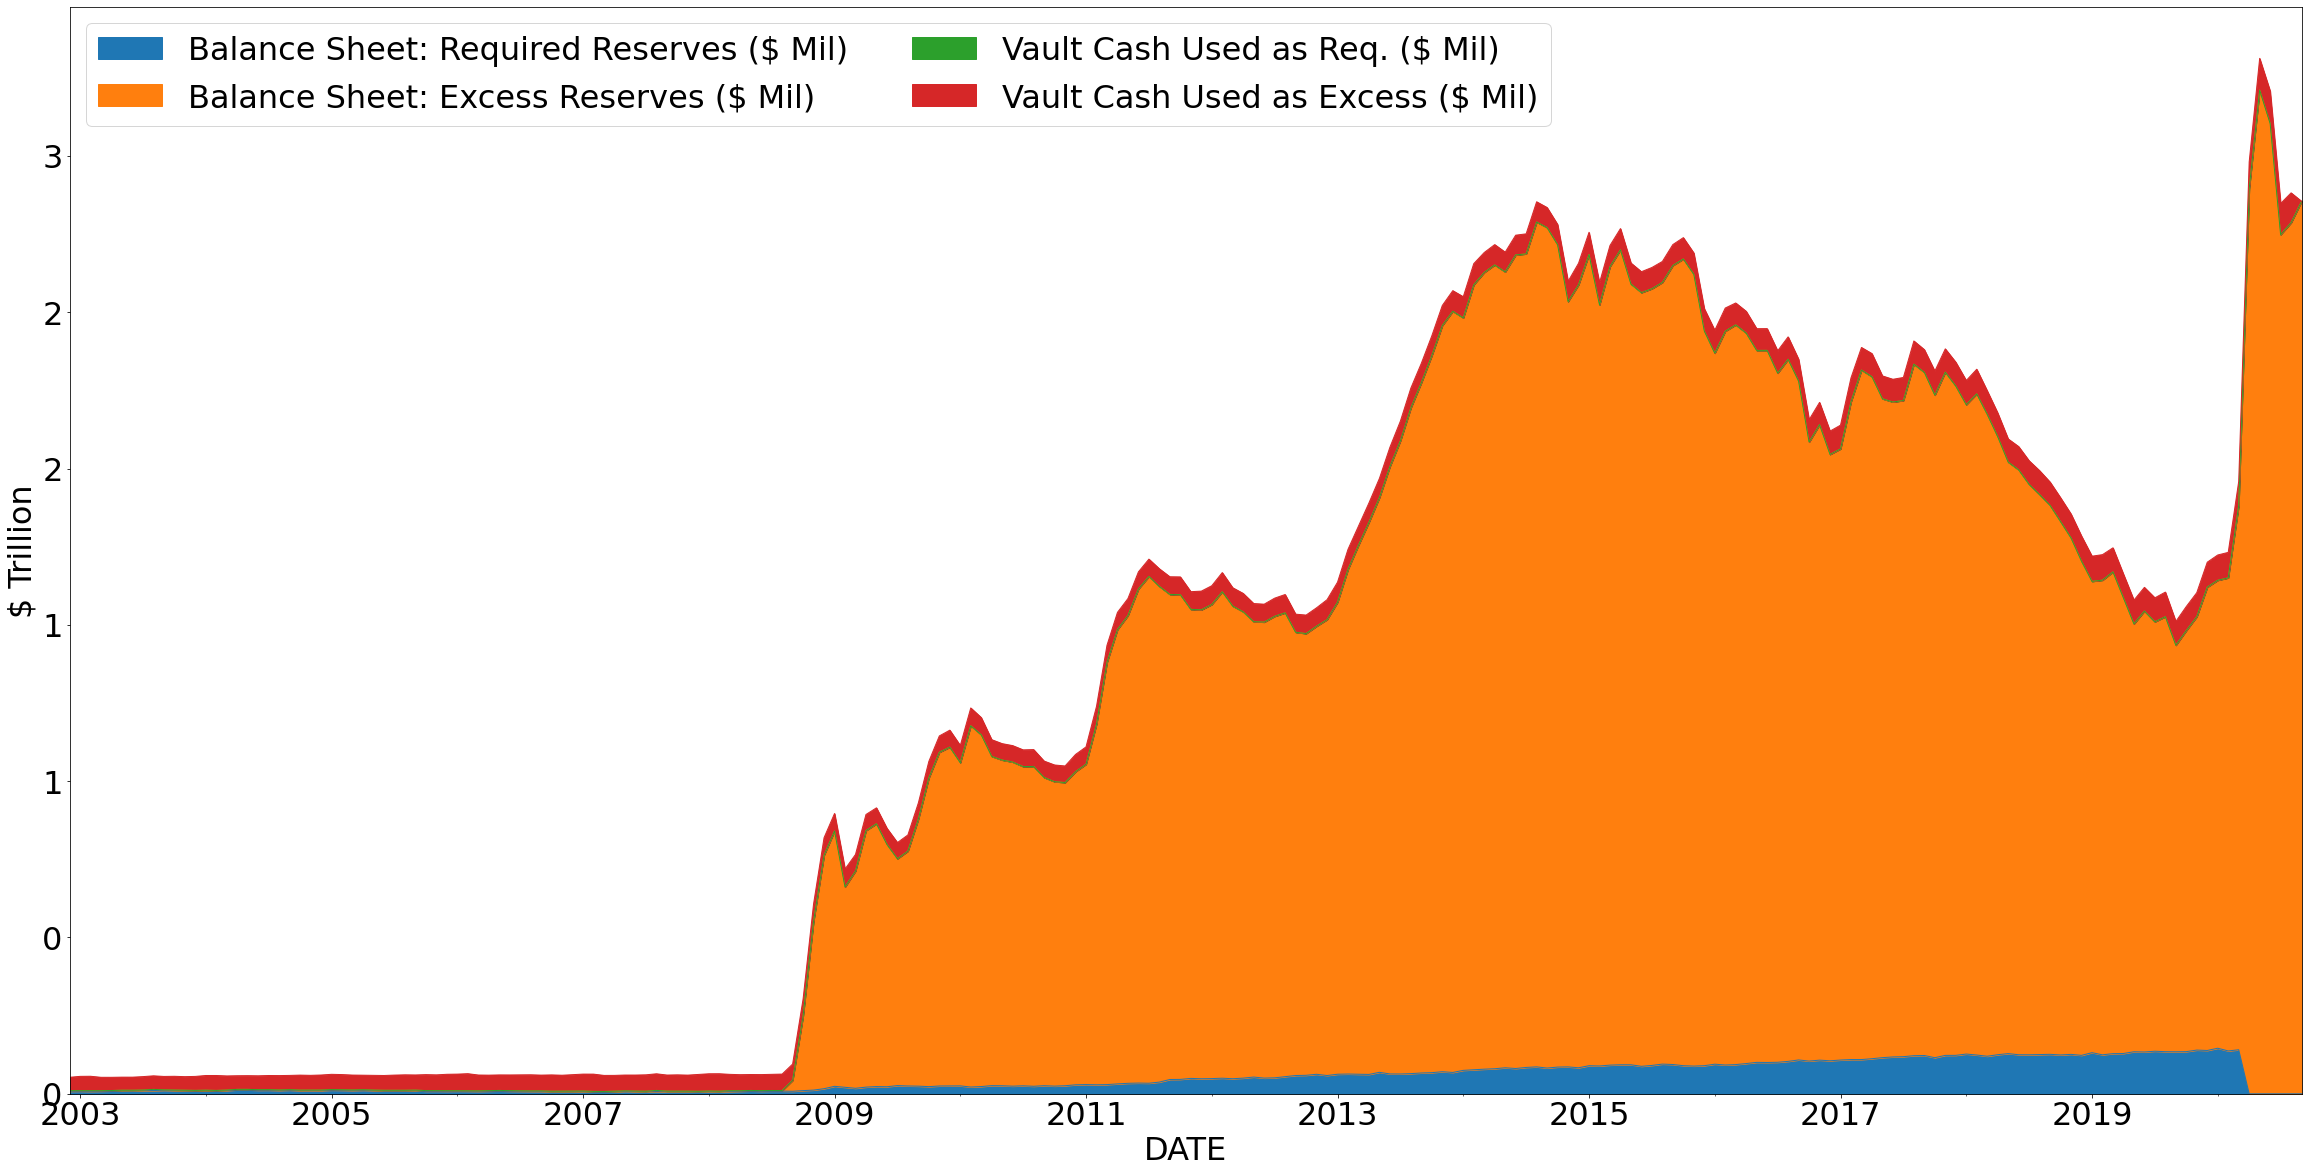

In [16]:
data["Vault Cash Used as Excess ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(data["Vault Cash Used as Req. ($ Mil)"])

reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)",
                "Balance Sheet: Excess Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
                "Vault Cash Used as Excess ($ Mil)",]
plot_stacked_lines(data, reserve_vars)

shows the structure of the fed

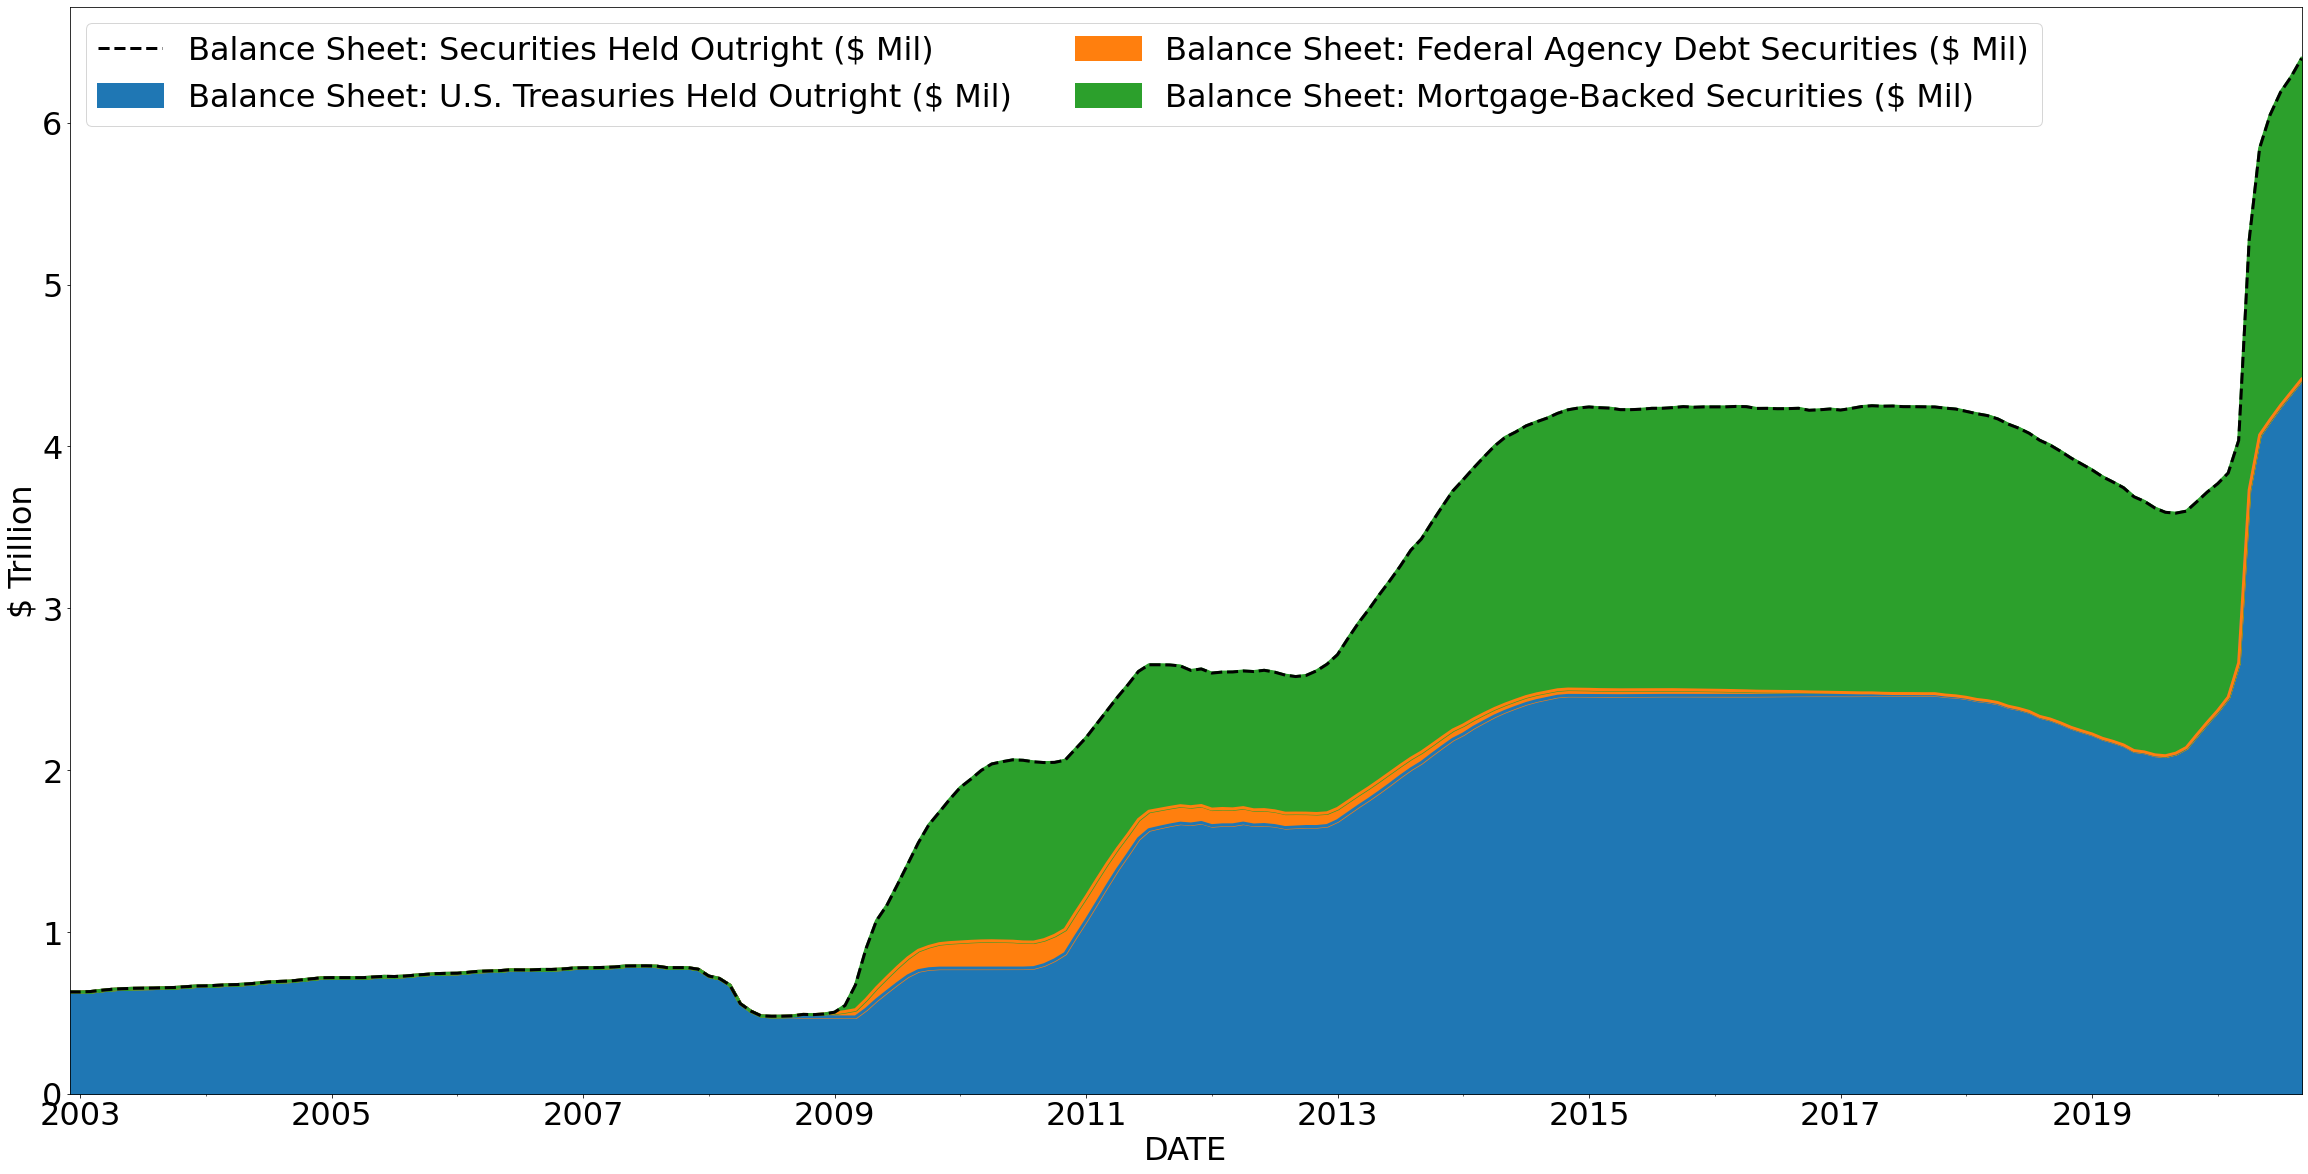

In [17]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]

# these three subcomponents comprise the value of securities held outright in its entirety. To more distinctly show
# the total value of securities held by the Fed, increase linewidth.
plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Balance Sheet: Securities Held Outright ($ Mil)")

turned previous graph into scaterplots so we can see the variables better

/Users/shoo/Documents/ndsu/2020/fall/ECON411/Portfolio/datlib/plots.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = [int(str(ind)[:4]) for ind in df.index]


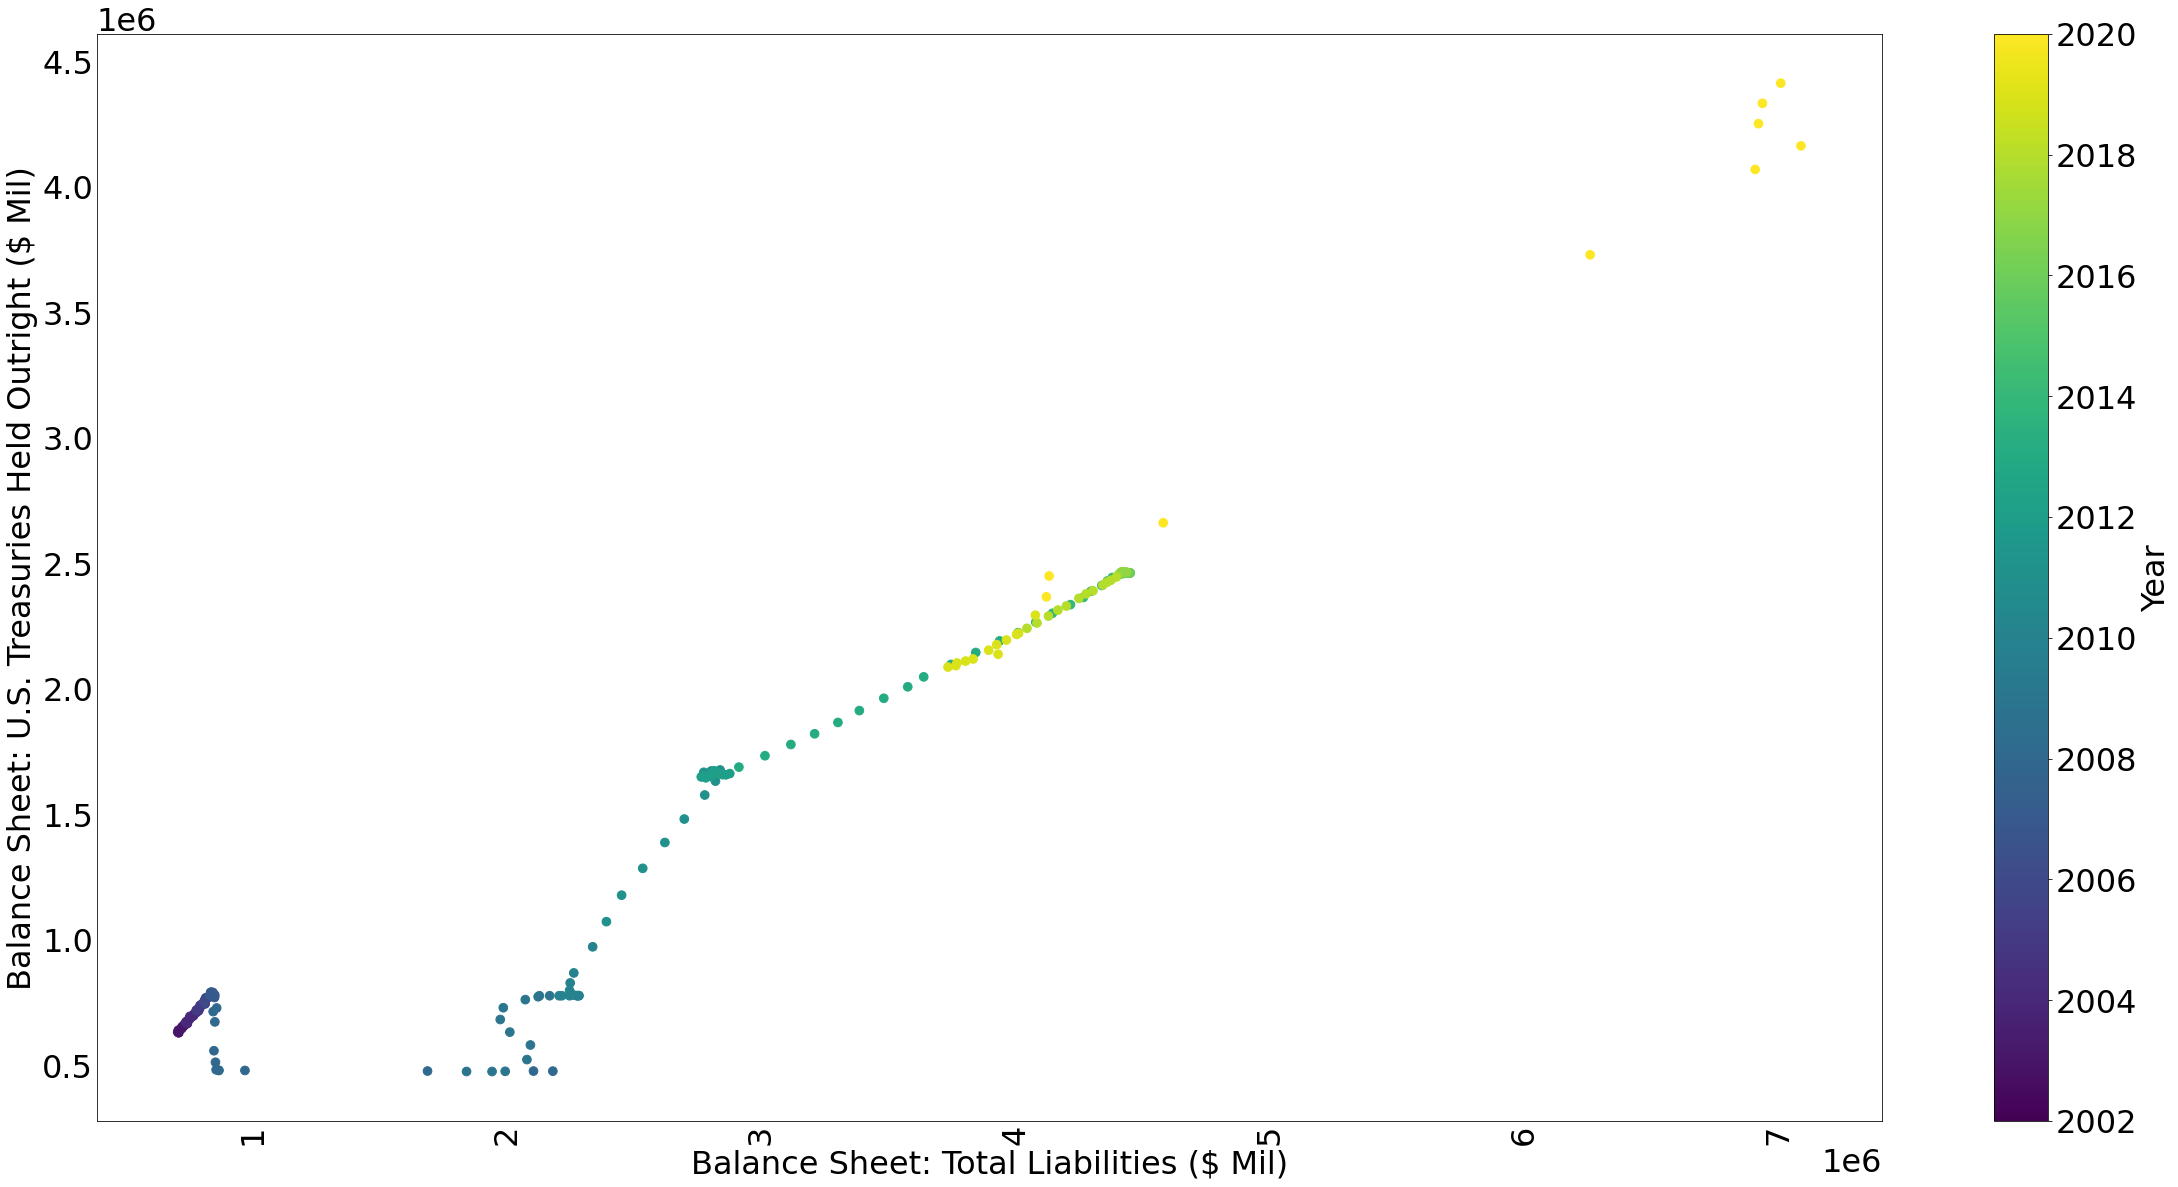

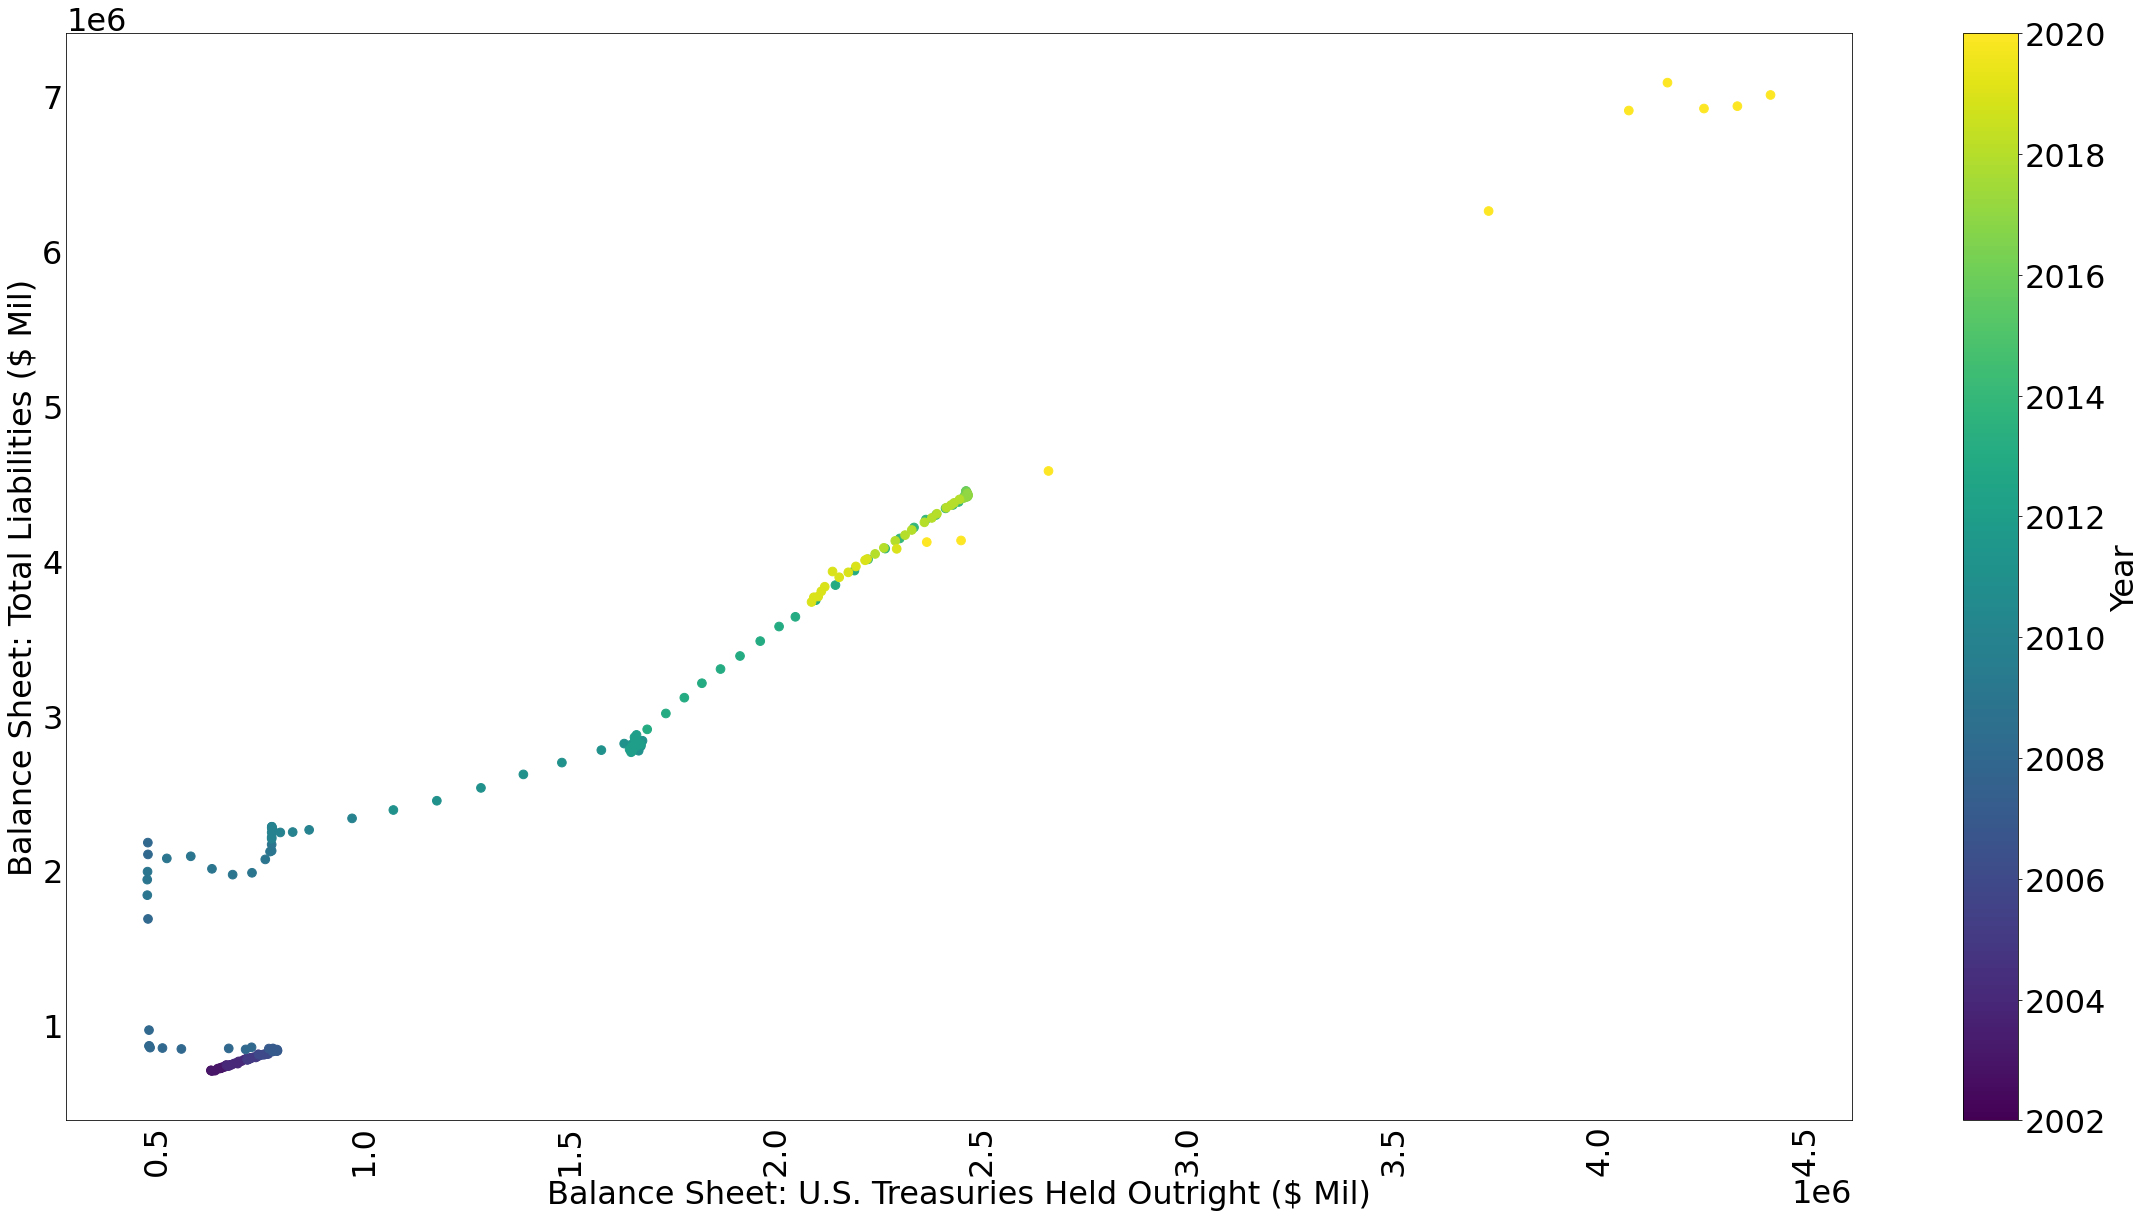

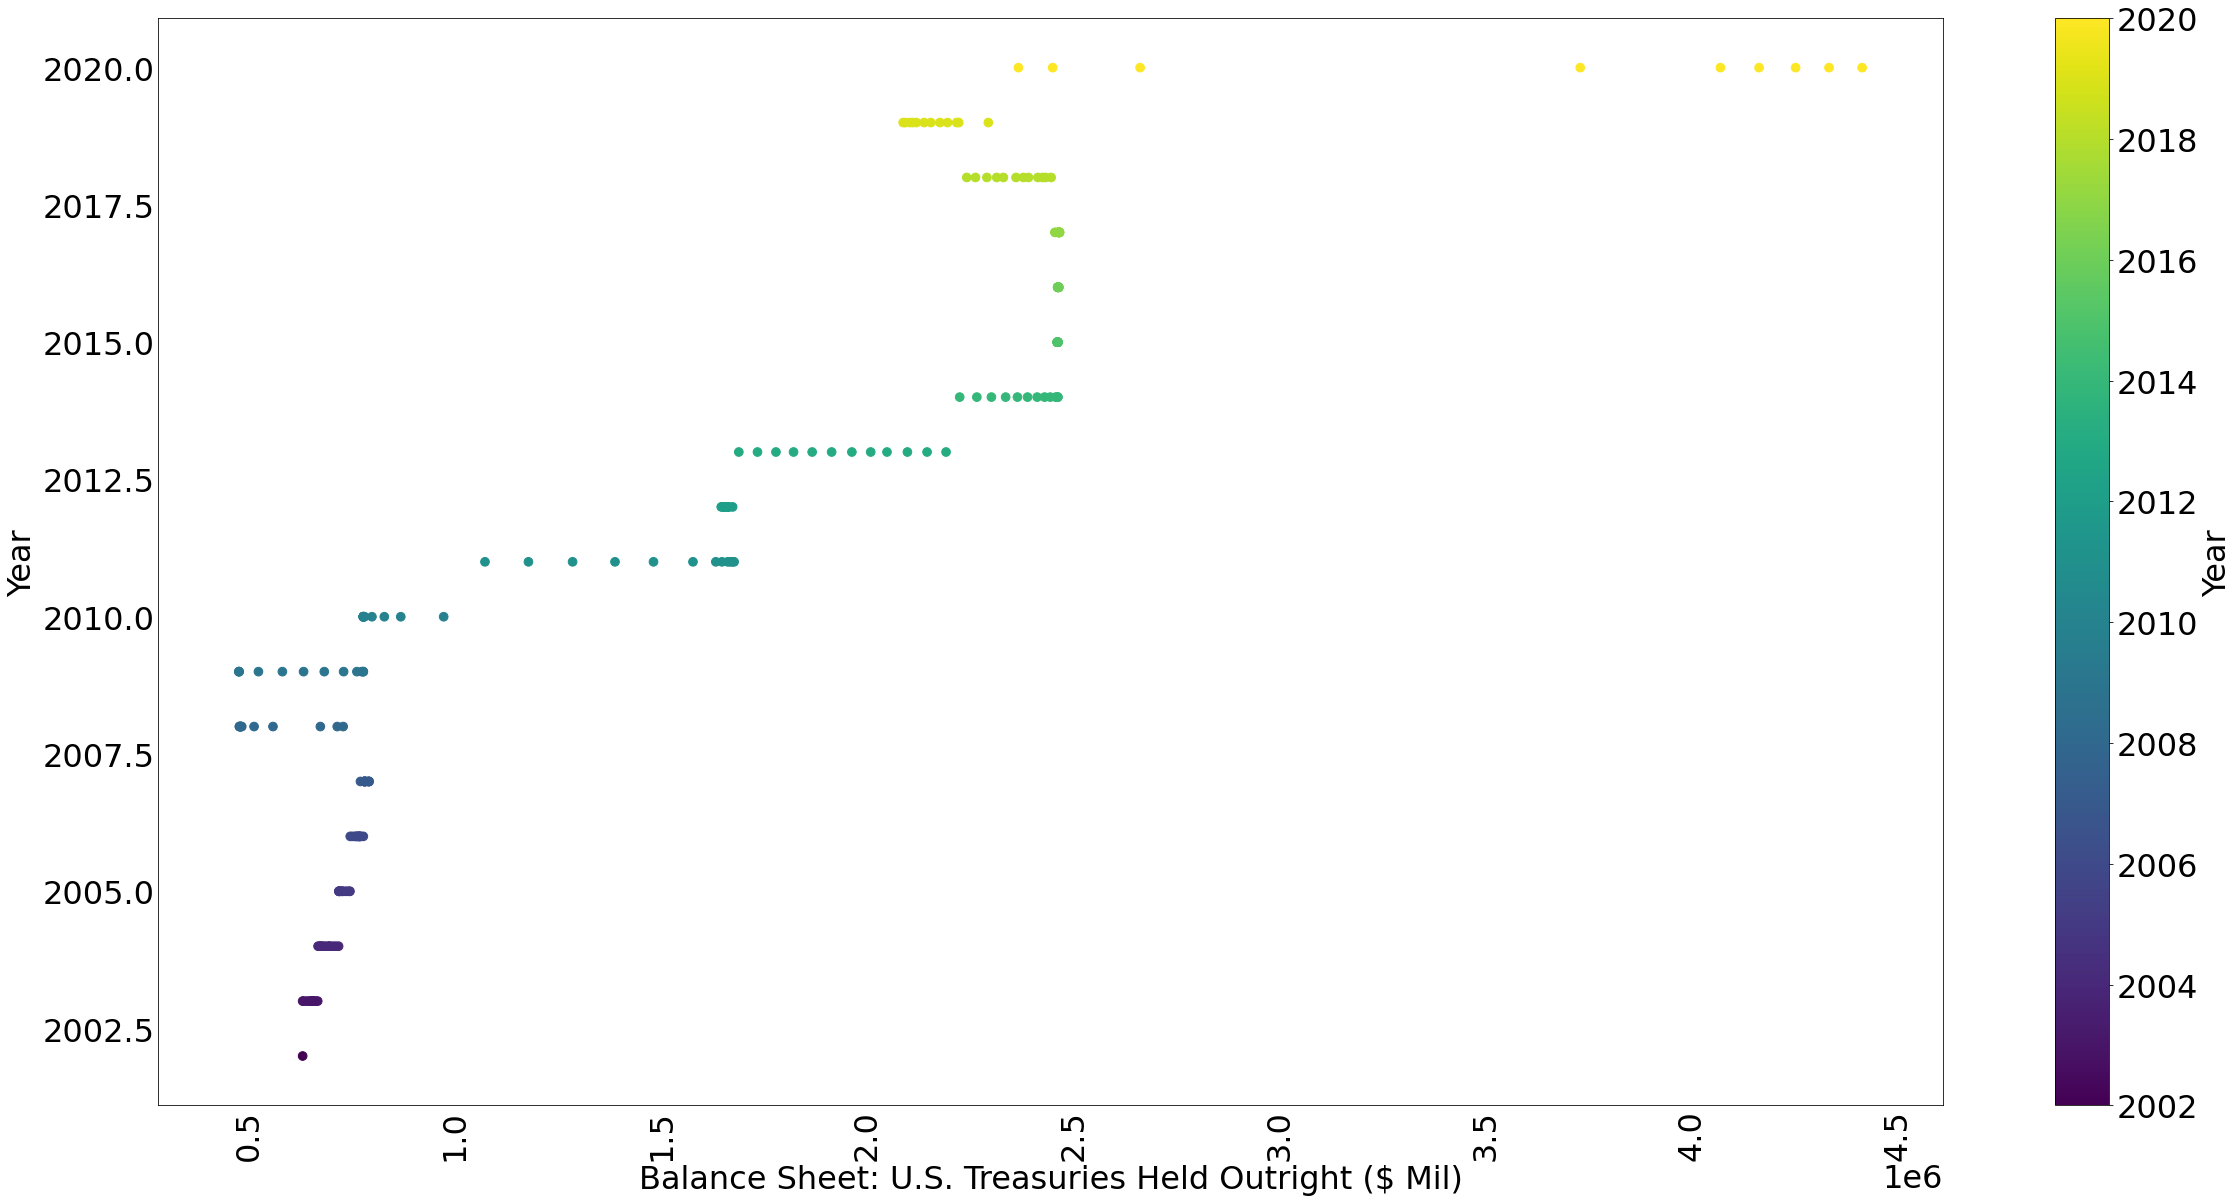

In [18]:
scatter_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]
plot_ts_scatter(data[scatter_vars])

shows the securites held by the fed in the graph

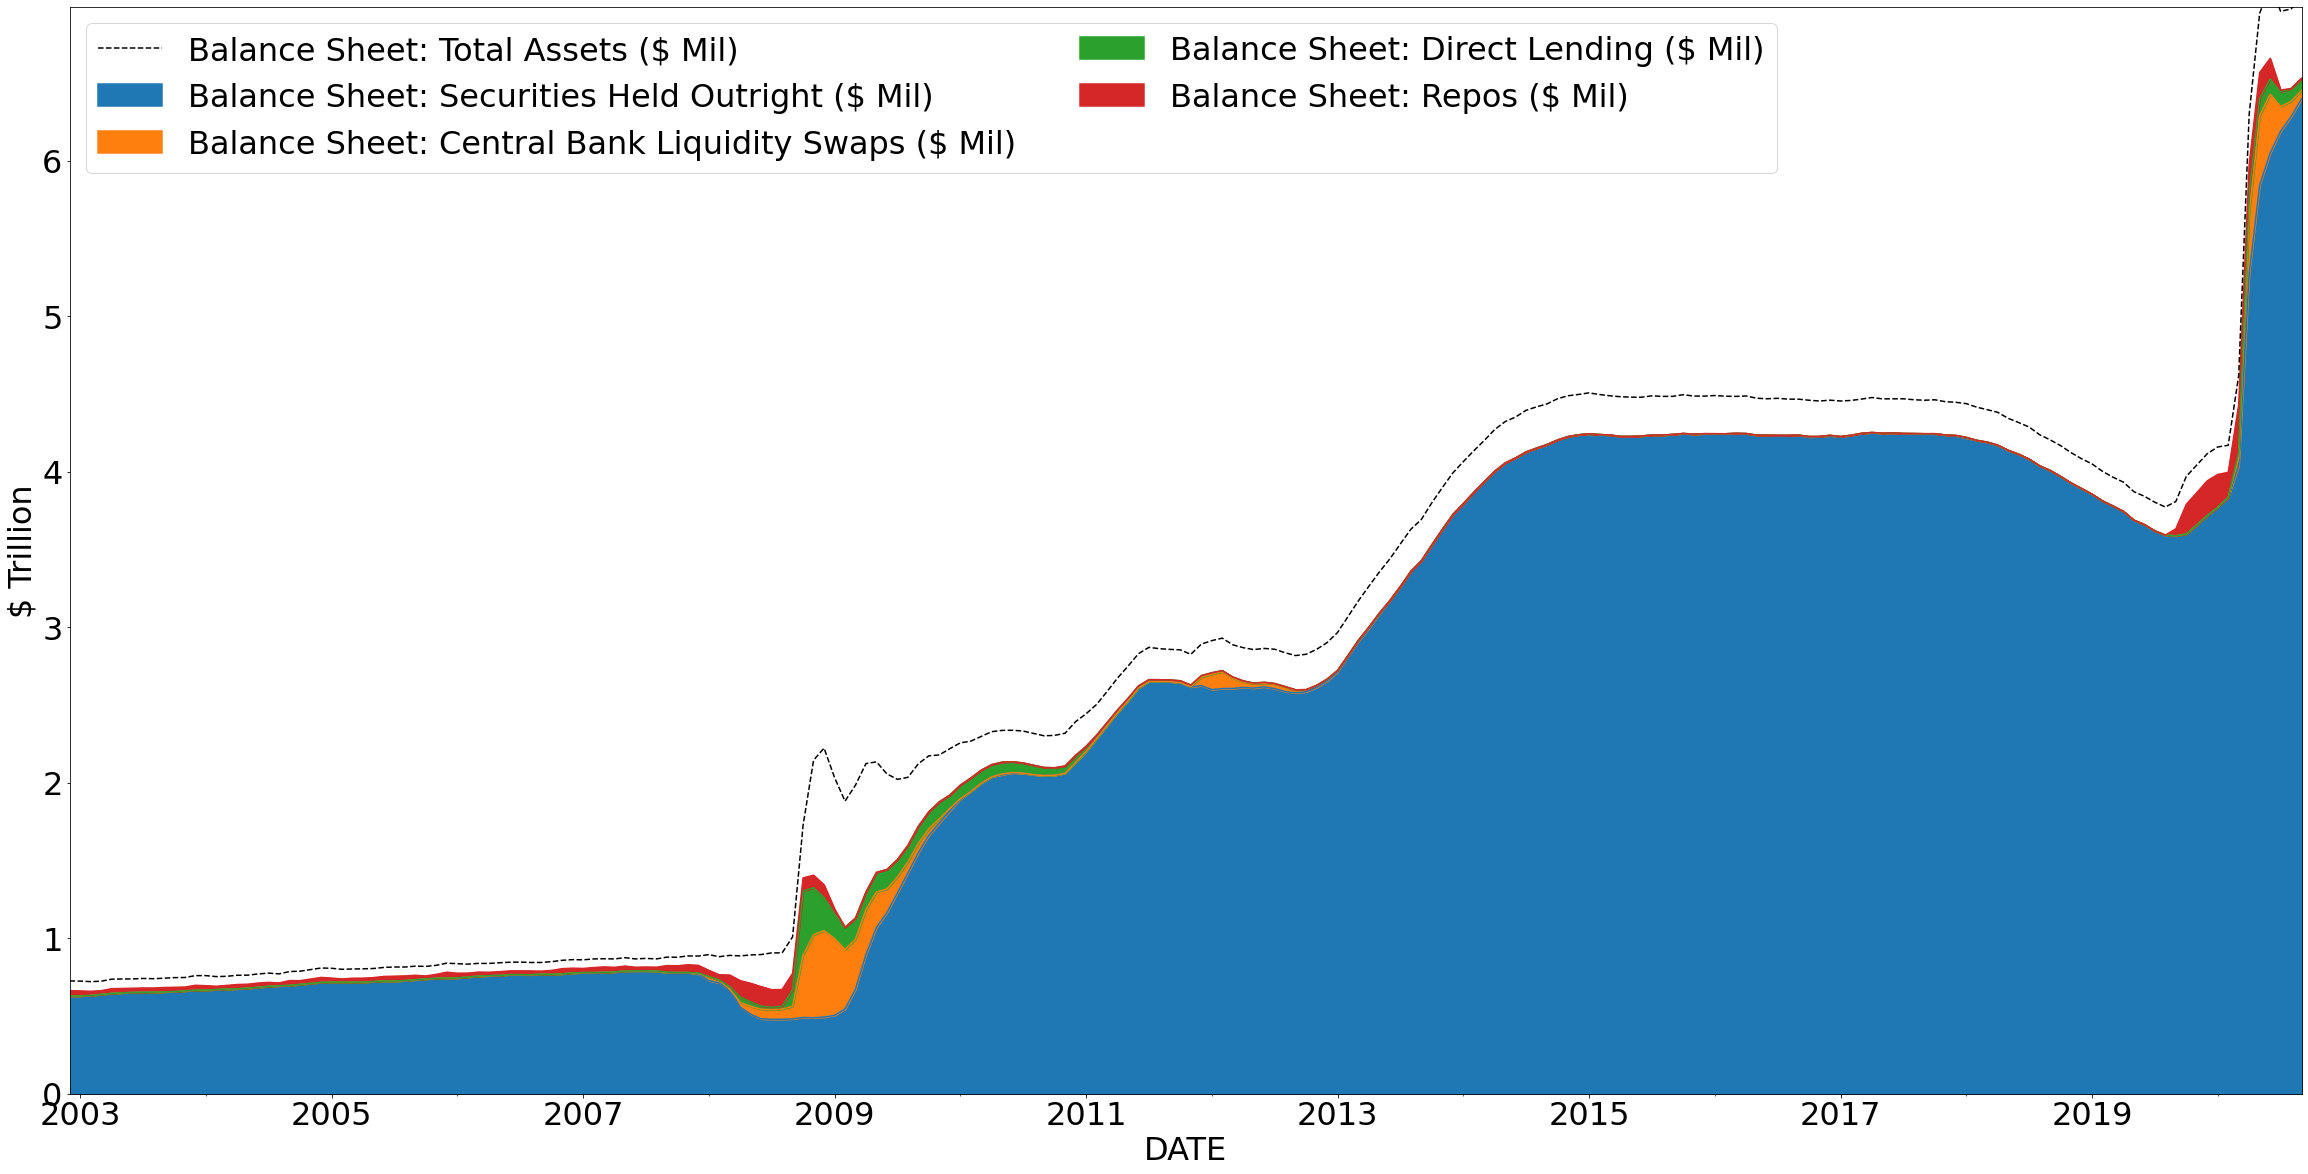

In [19]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")

adds unamortized securities to the graph

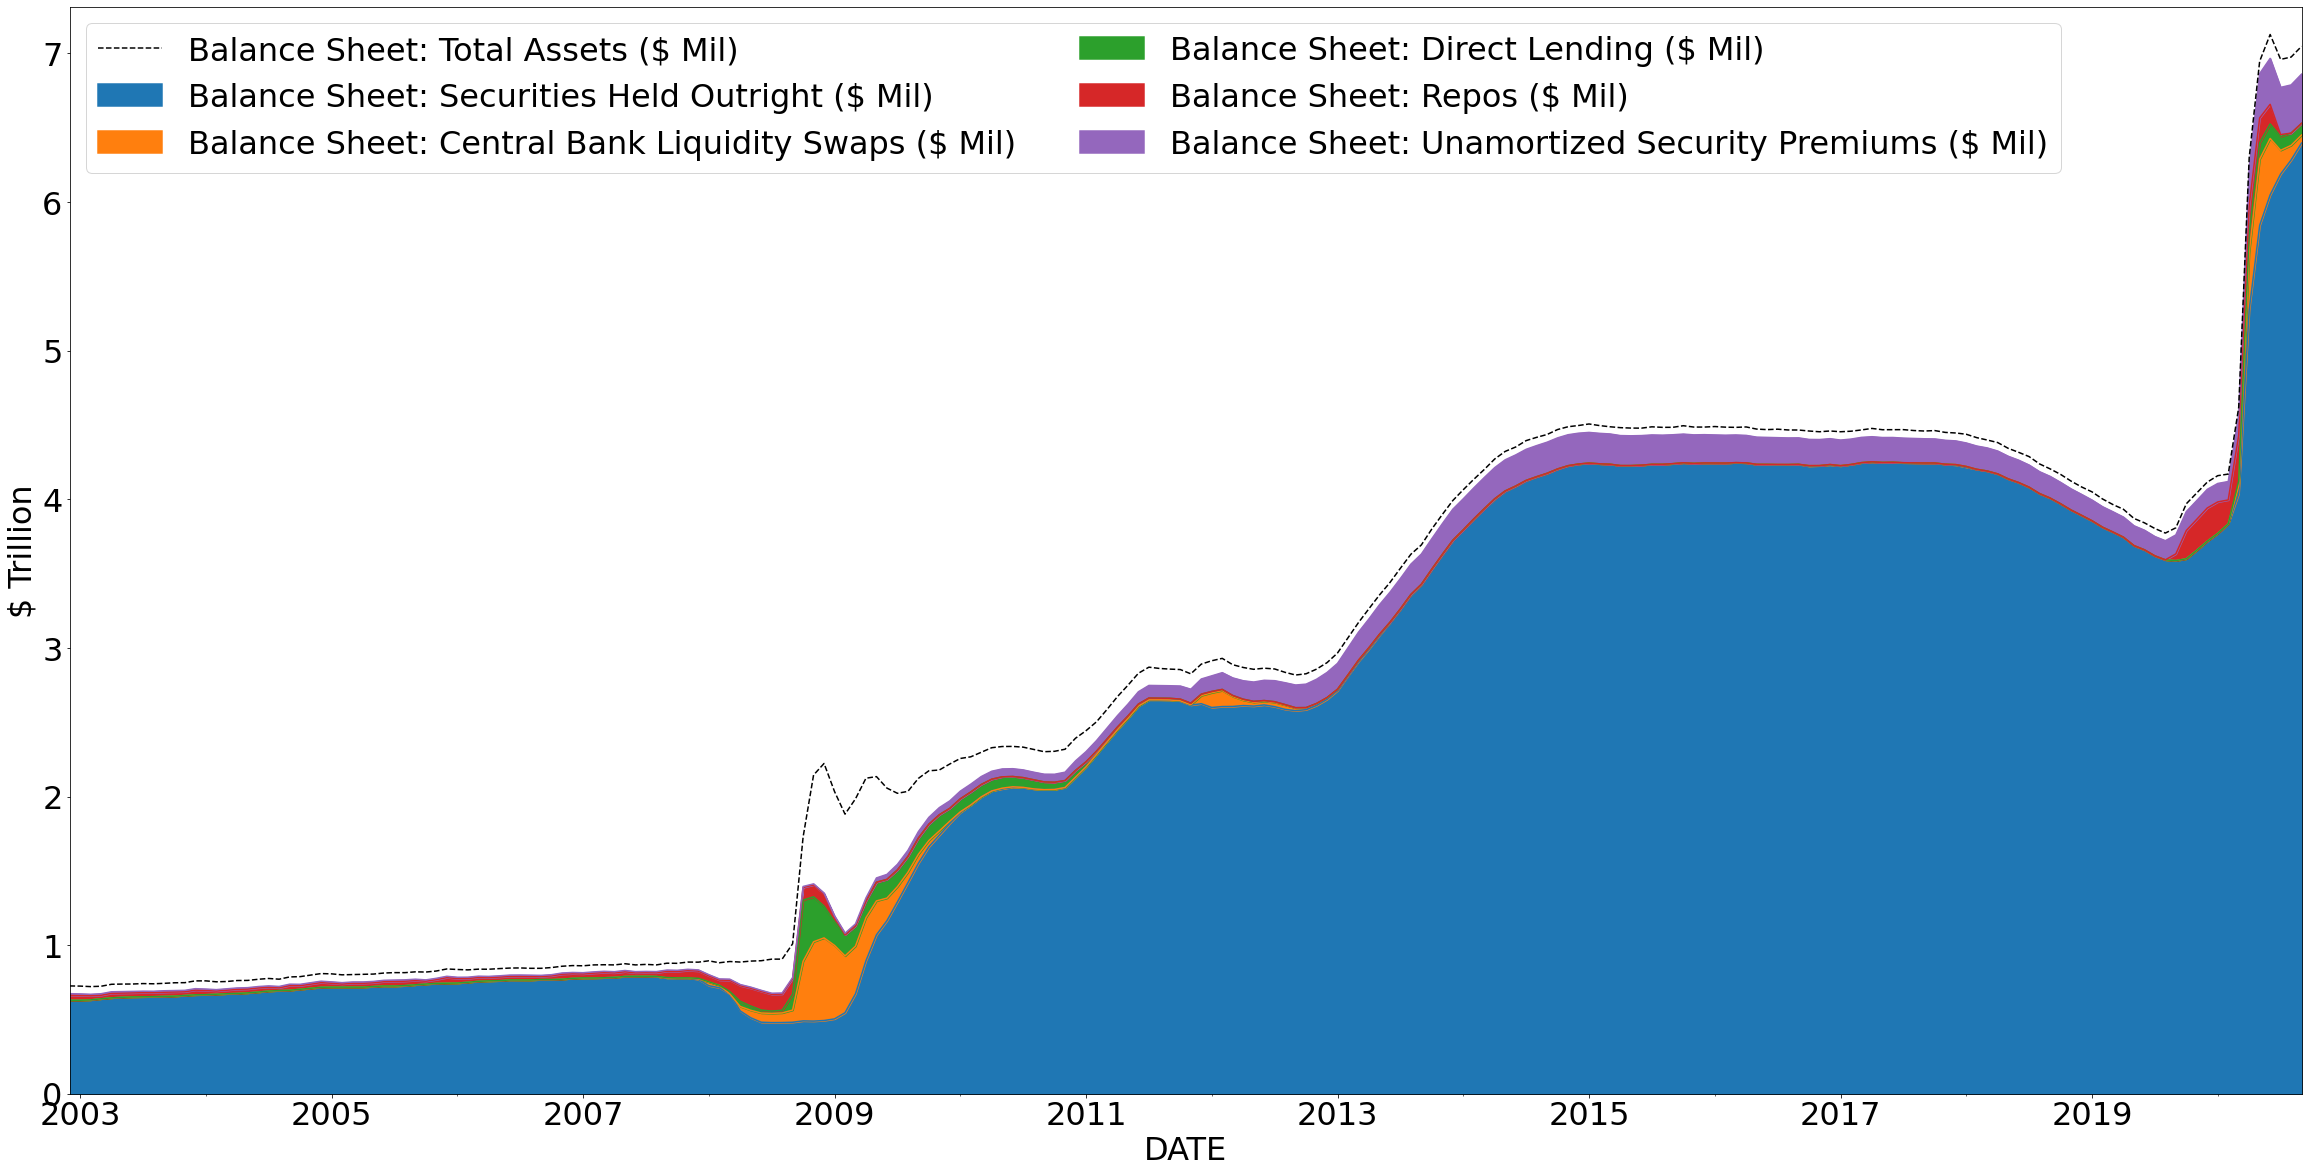

In [20]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")


creates a new catigory of a lot of small things that were no included earlier to fill in the rest of the graph

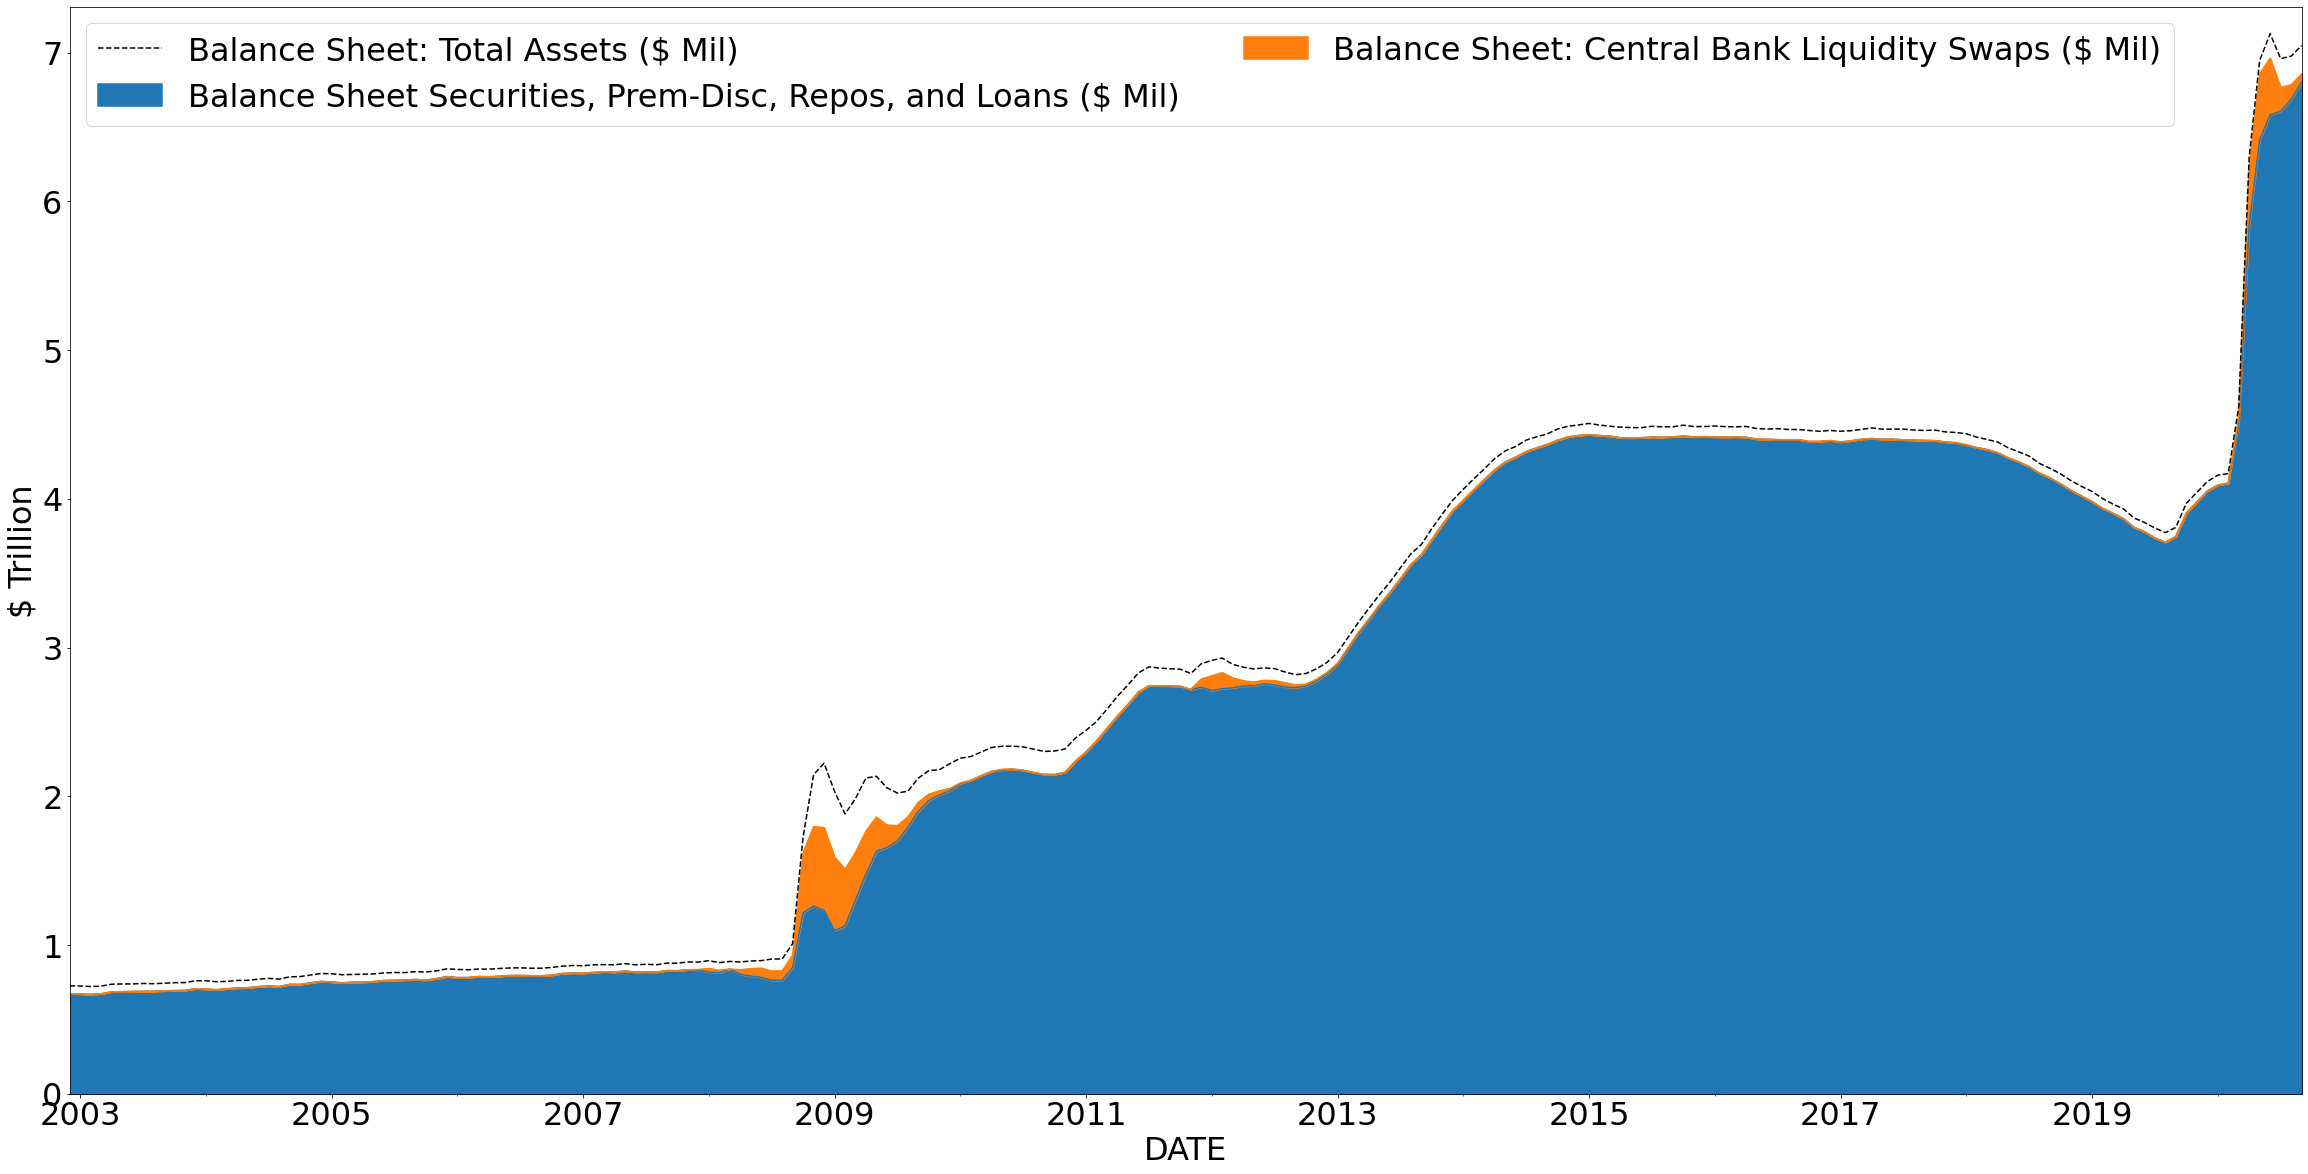

In [21]:
#fedProject
# . . . 
account_vars = ["Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",
                "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")


this graph shows all money in the us from both the fed and the treasury except for some small random amounts of cash being circulated

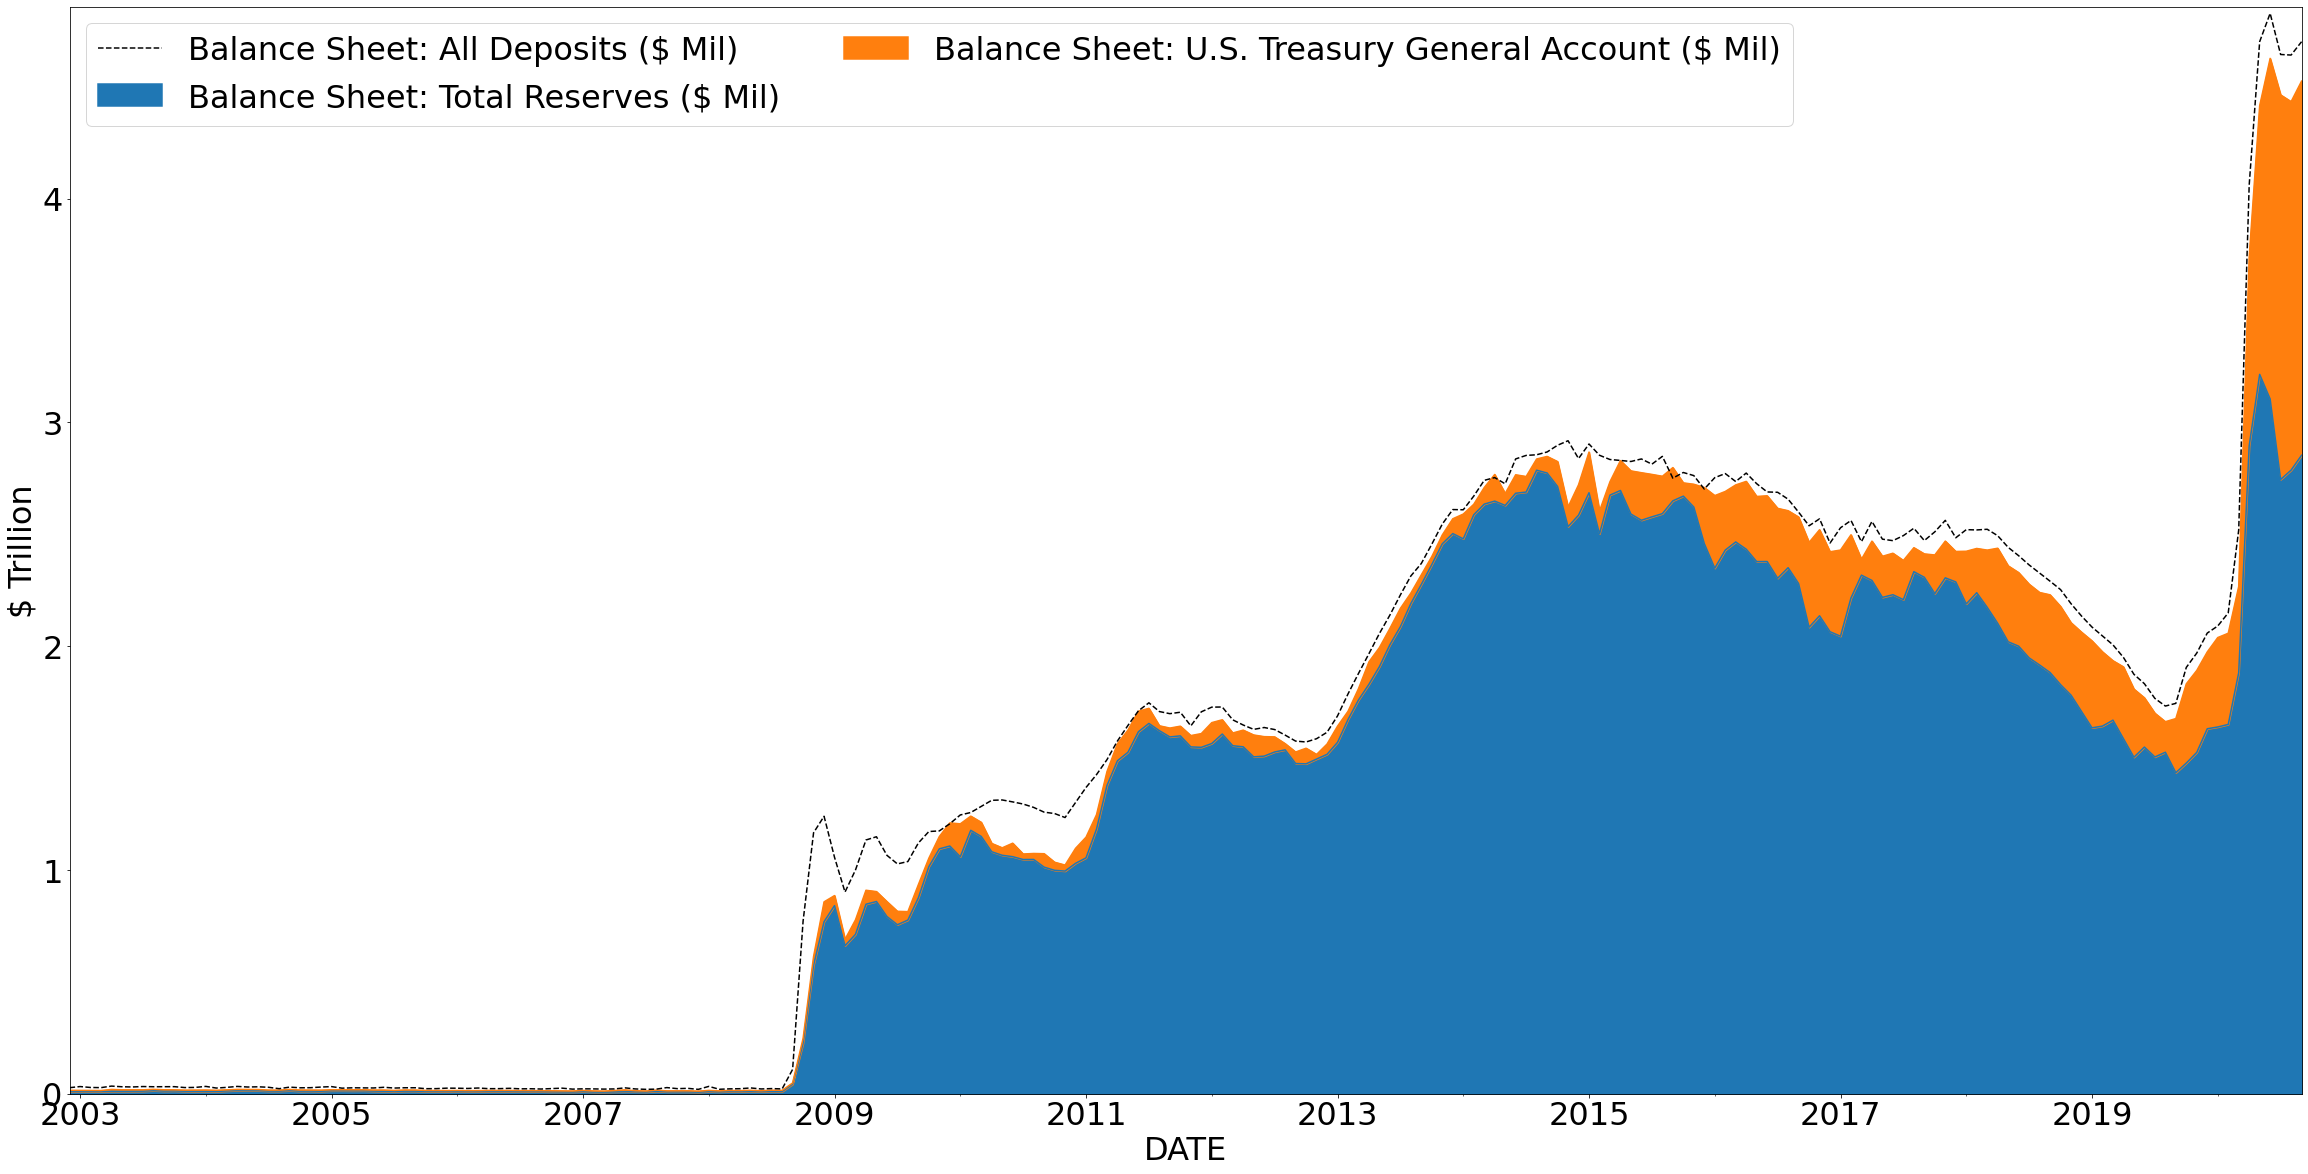

In [22]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: All Deposits ($ Mil)")

the code makes the graph show the distrubution of money in the economy (outstanding and total reserves)

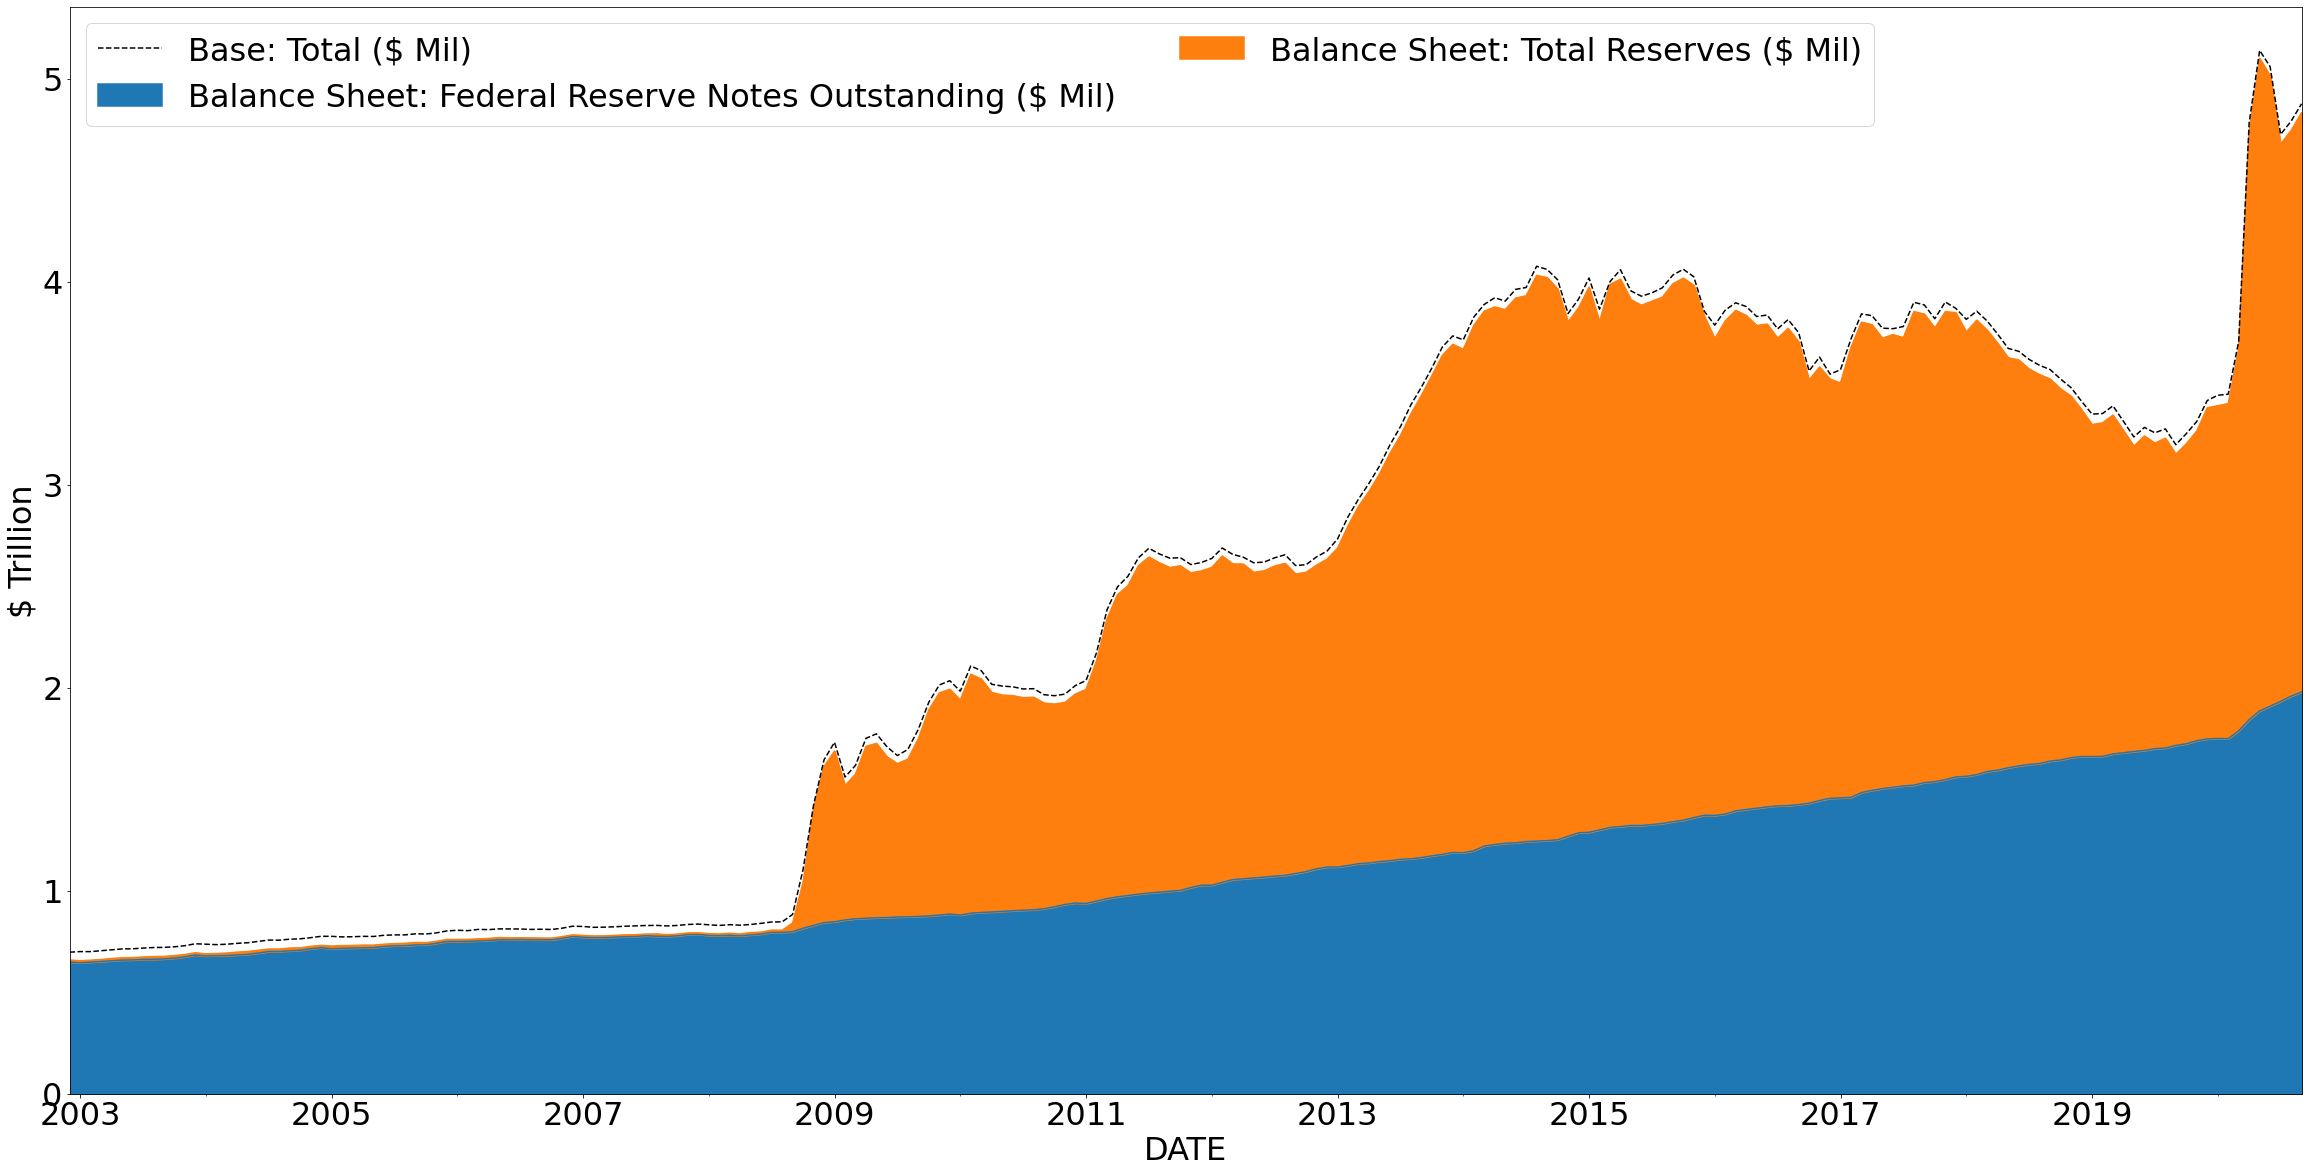

In [23]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Base: Total ($ Mil)")

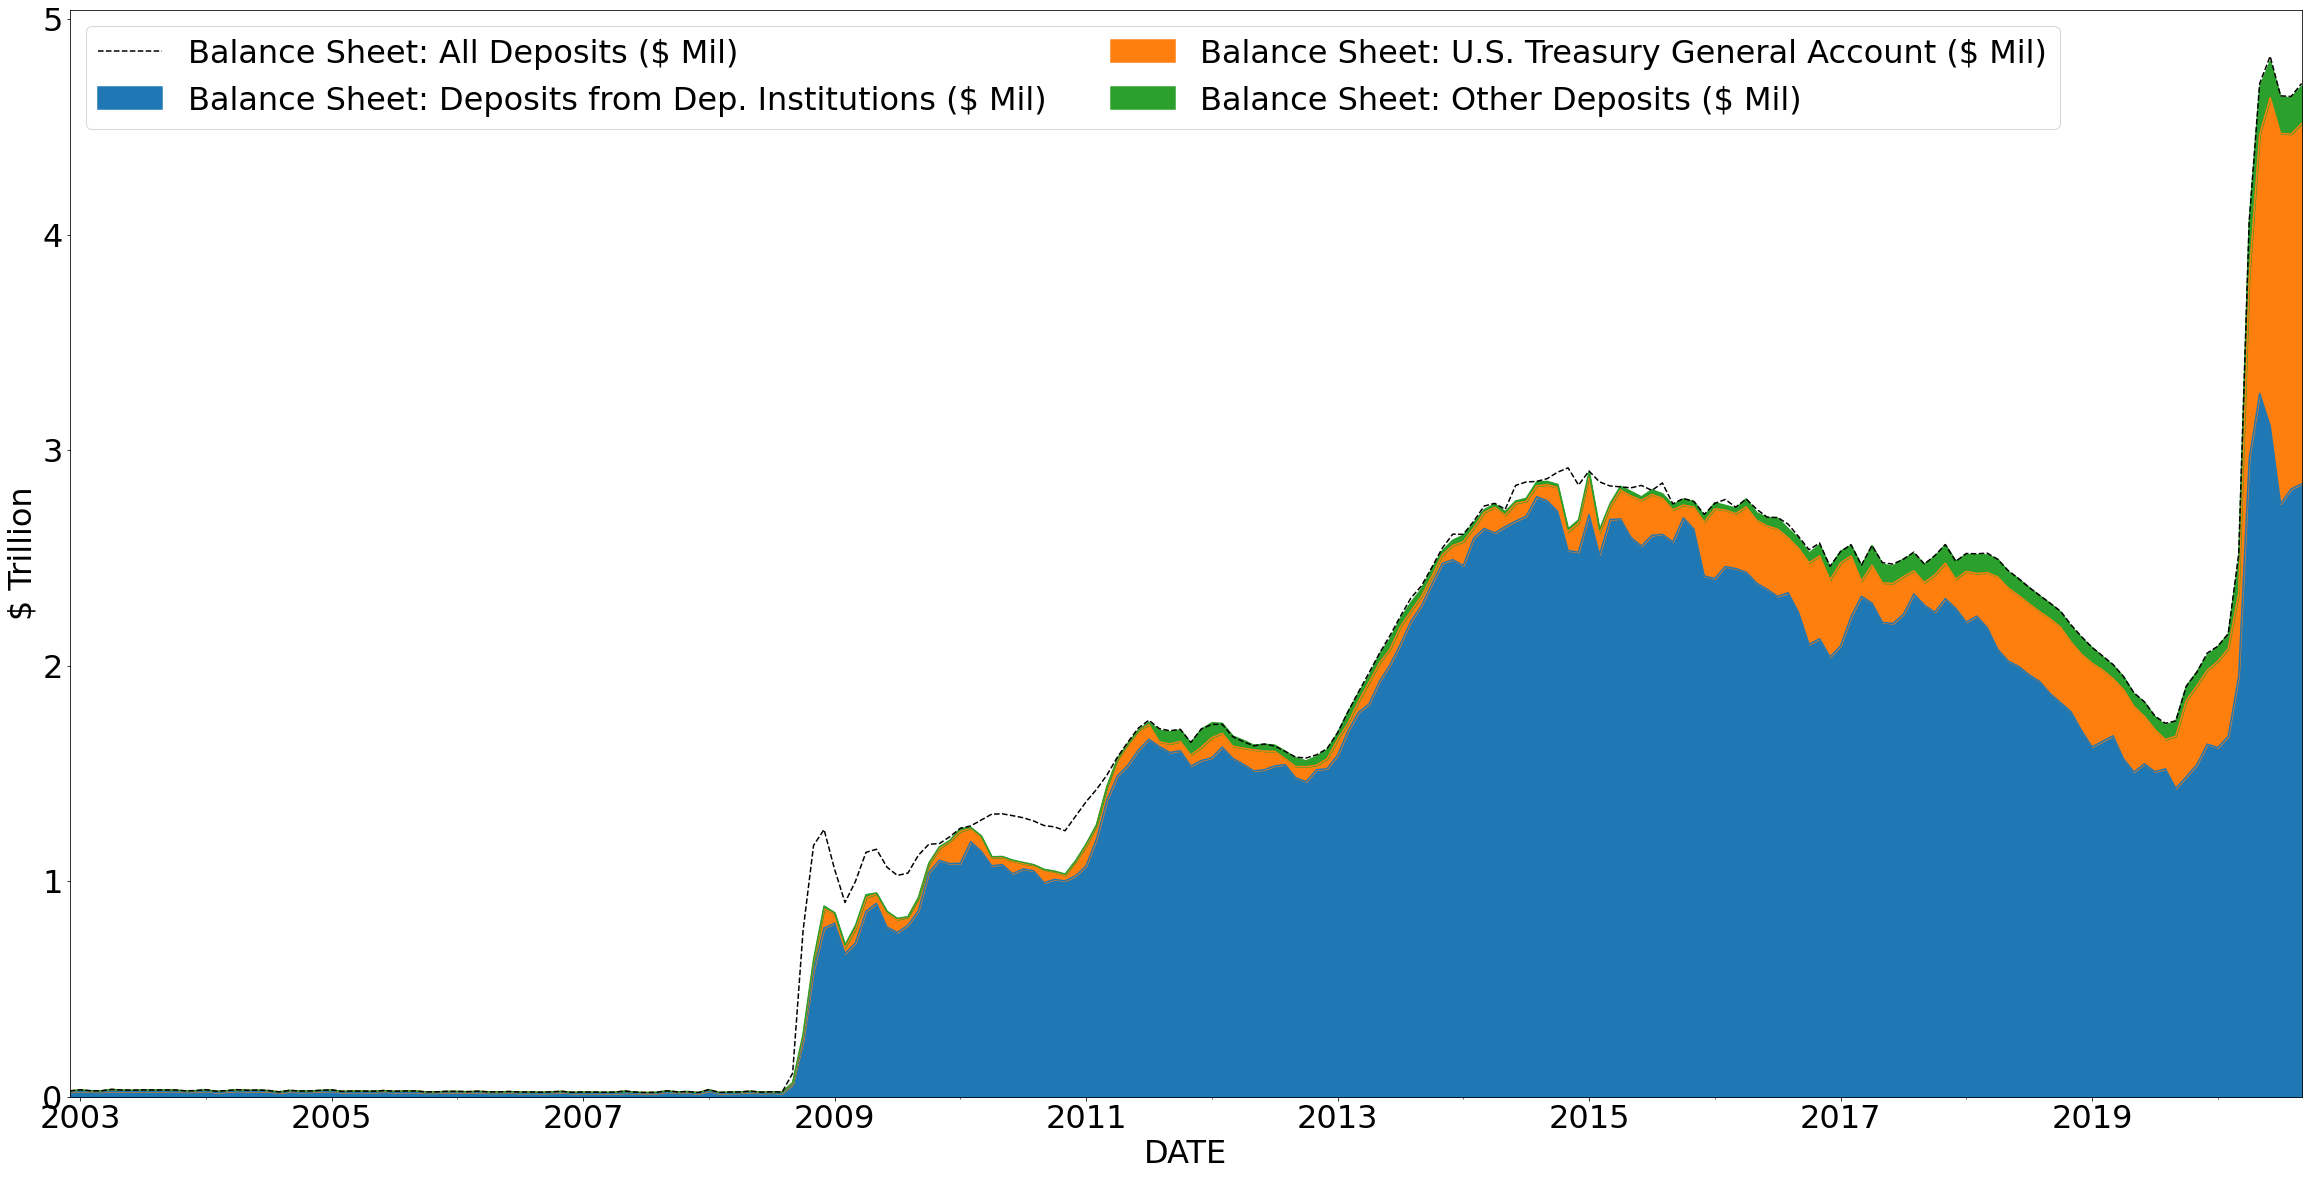

In [25]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: All Deposits ($ Mil)")

adds the overnight lending market and reverse repurchase agreements to the deposits to make the feds liabilities

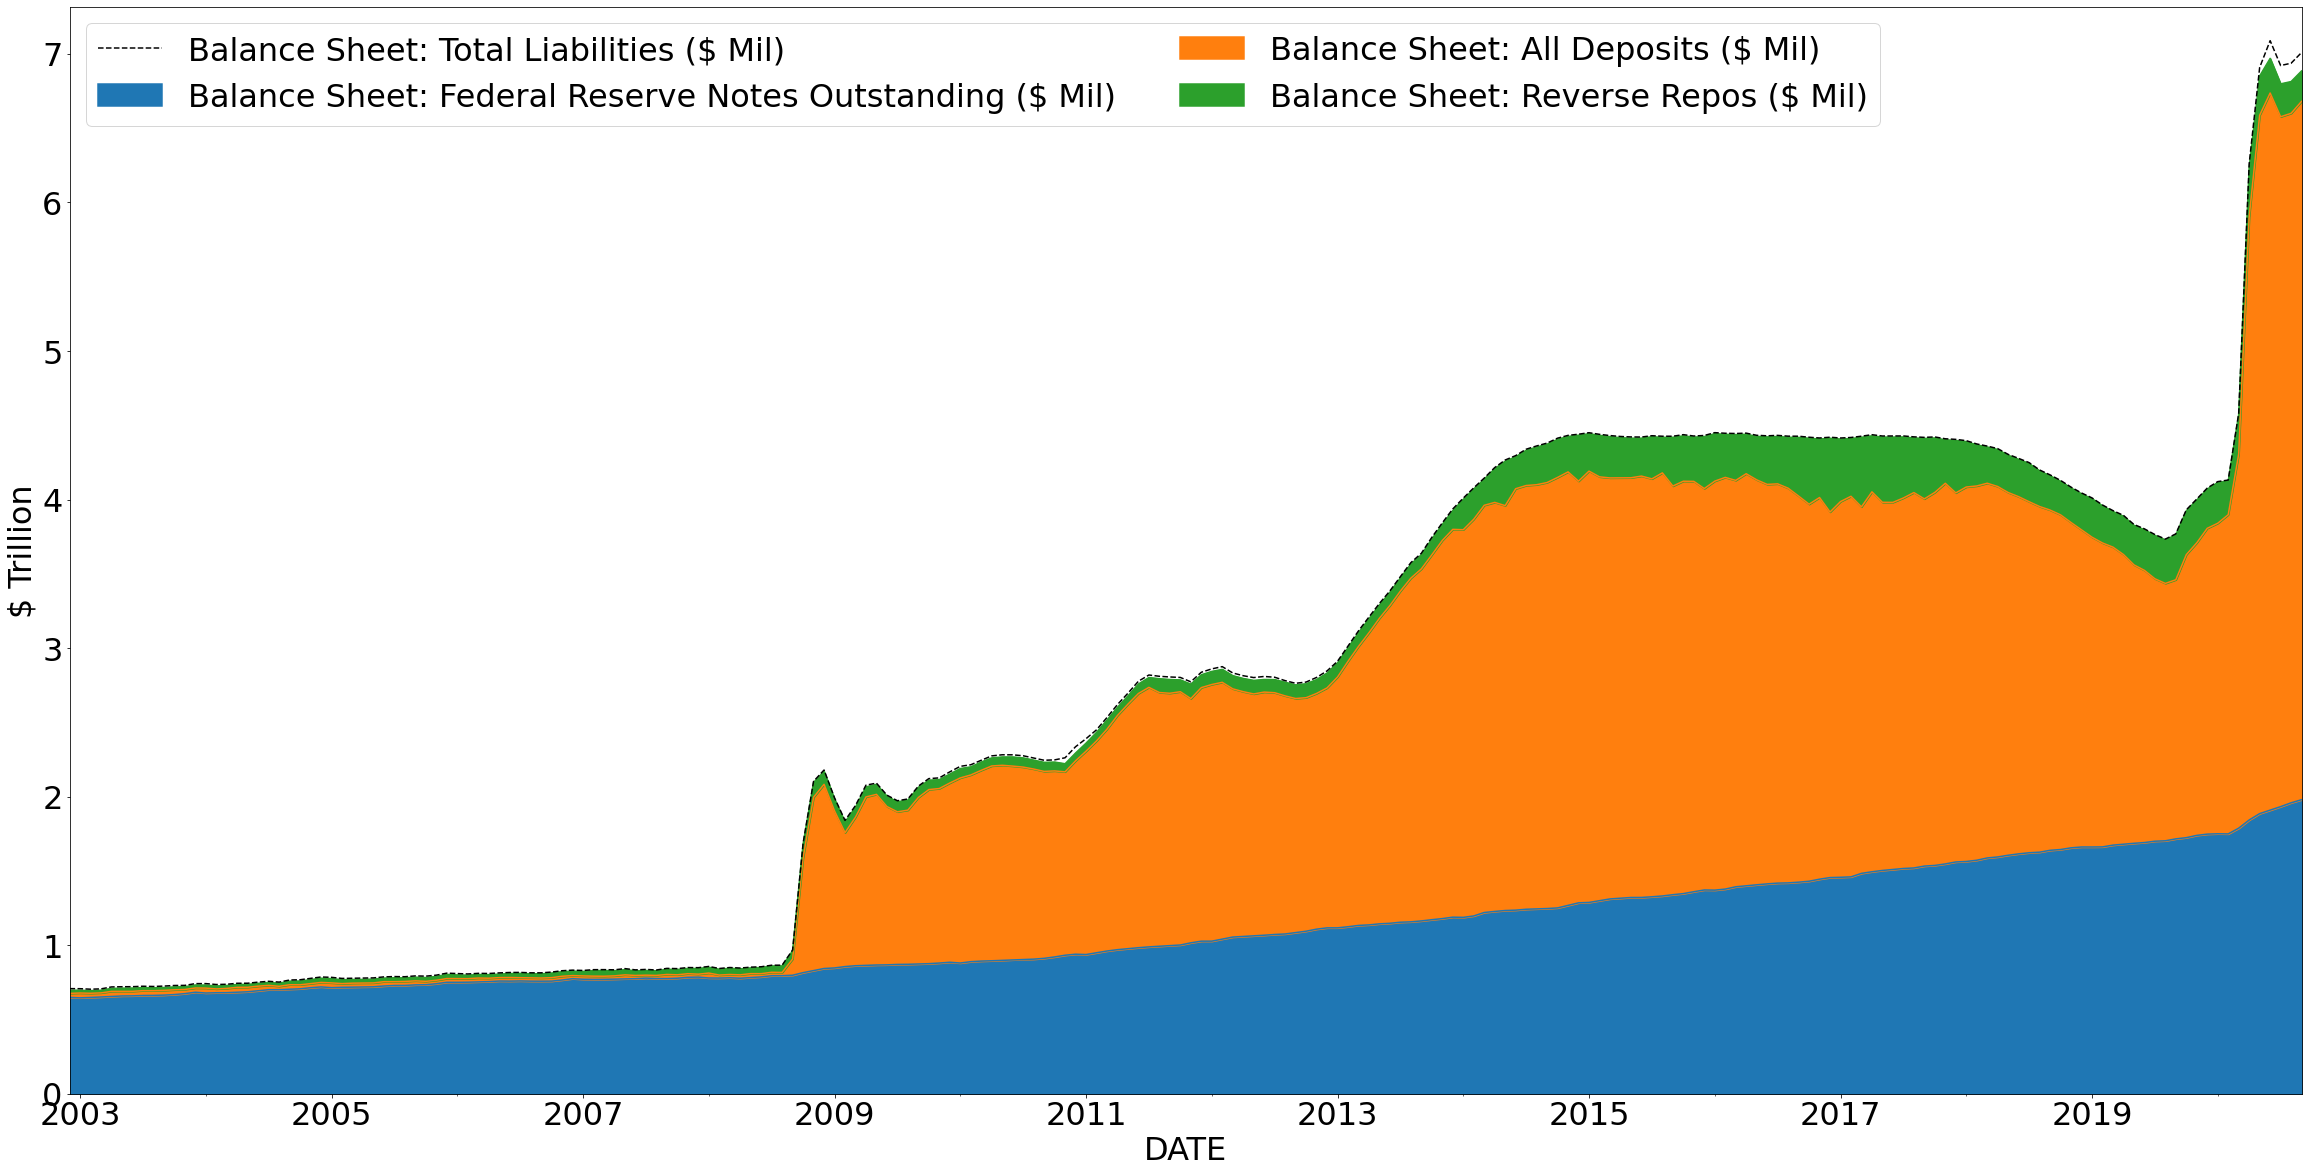

In [26]:
#fedProject
# . . . 
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Liabilities ($ Mil)")

shows Fed's operations in the overnight lending market

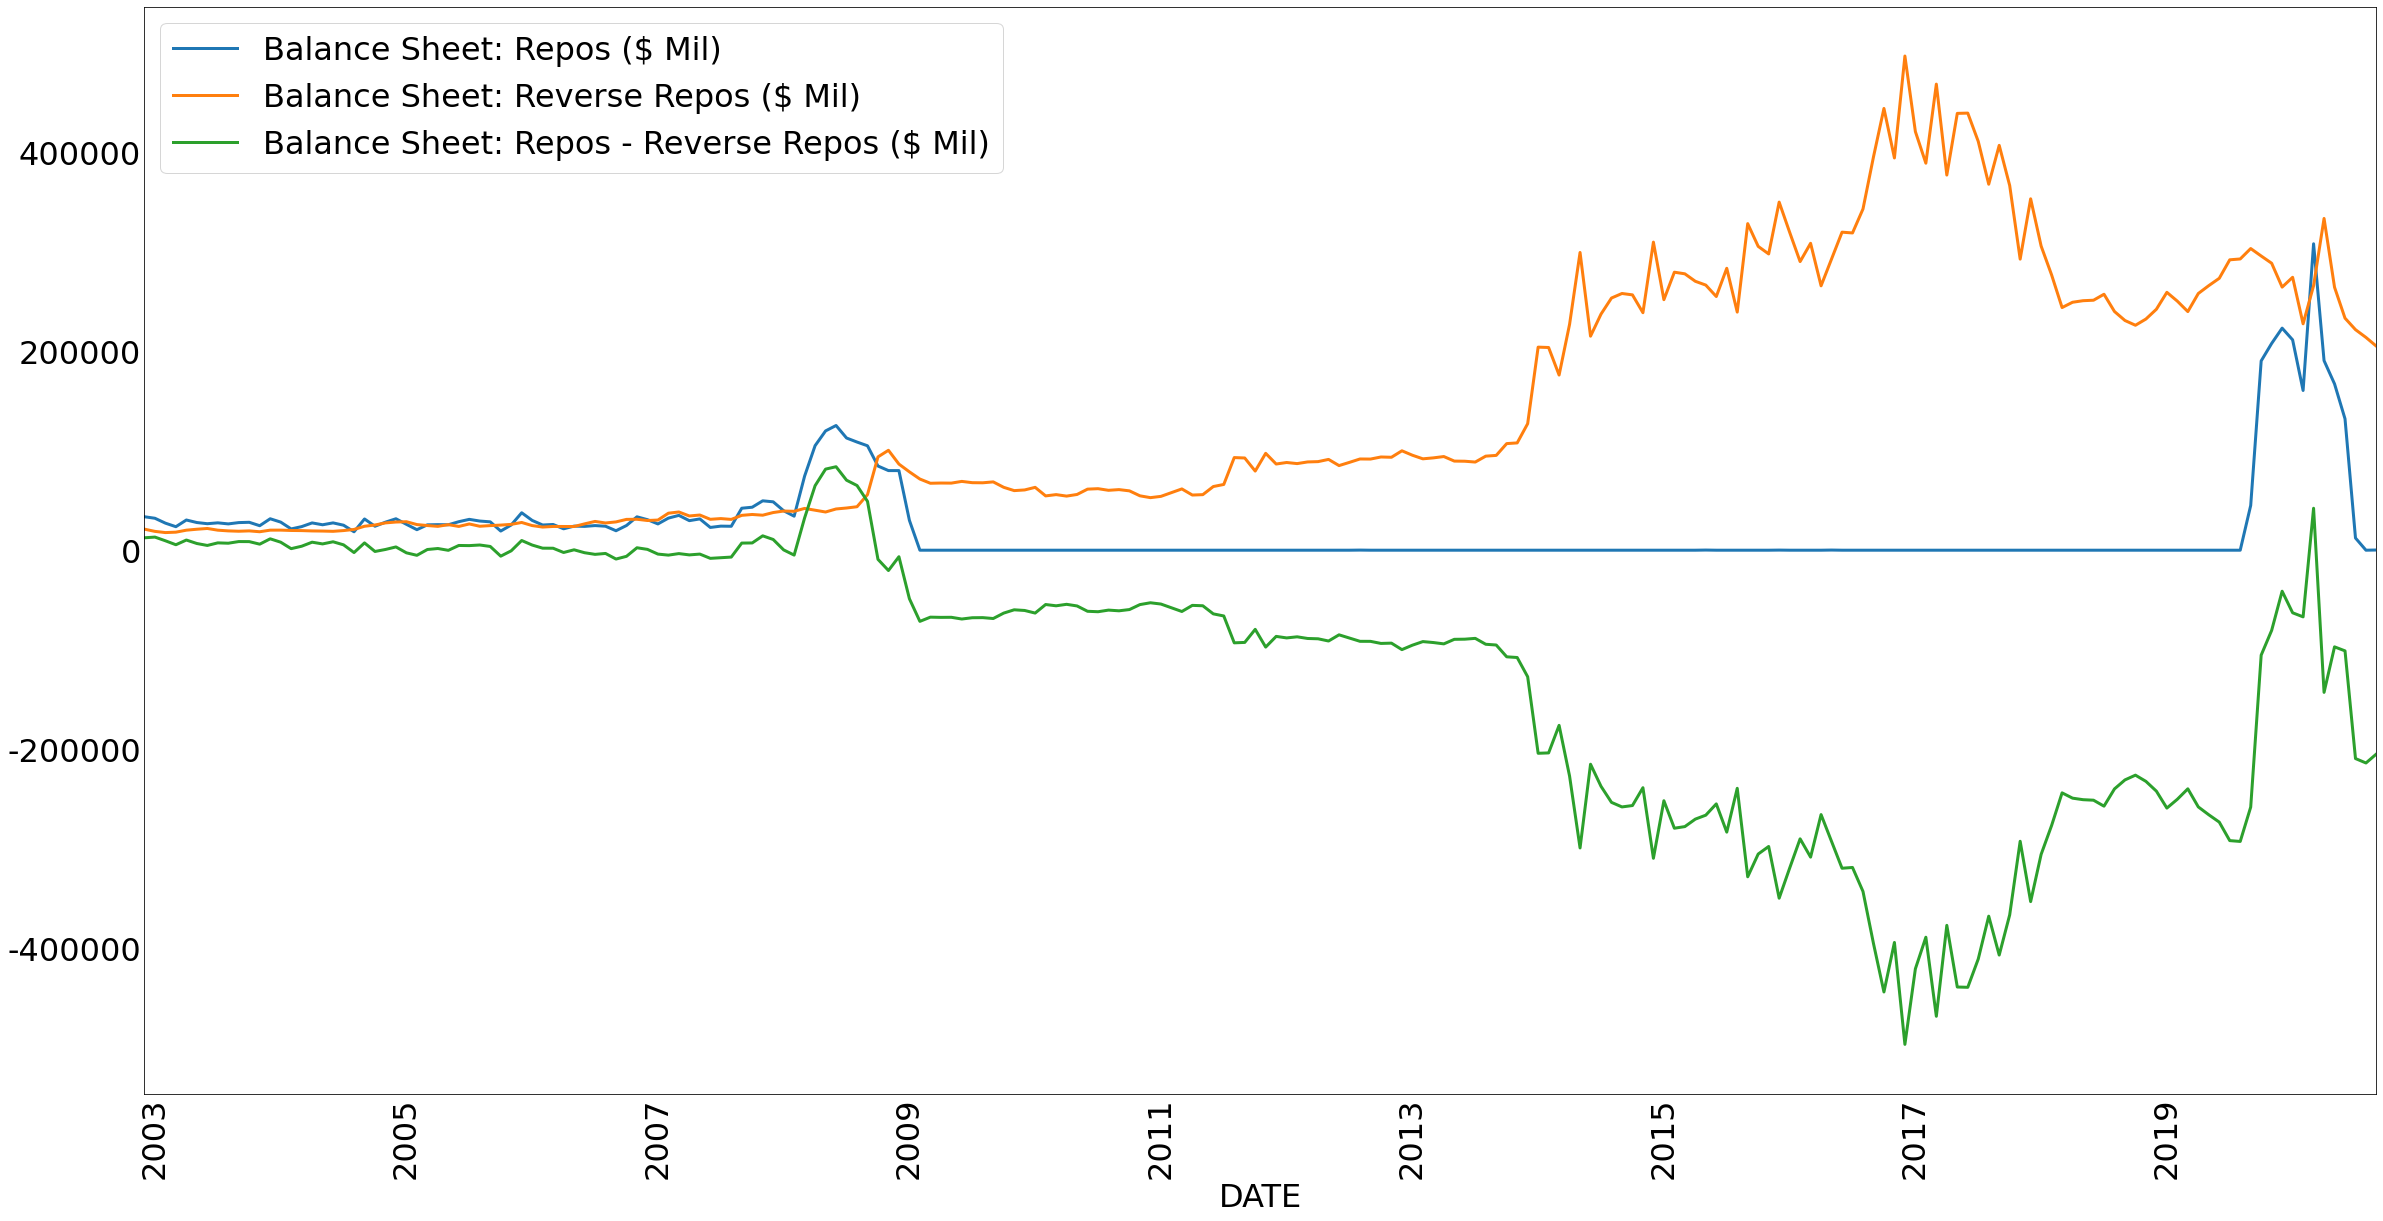

In [28]:
#fedProject.py
# . . . 
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(data[overnight_vars], linewidth = 3)


shows the federal funds rate and its target ranges plus intrest

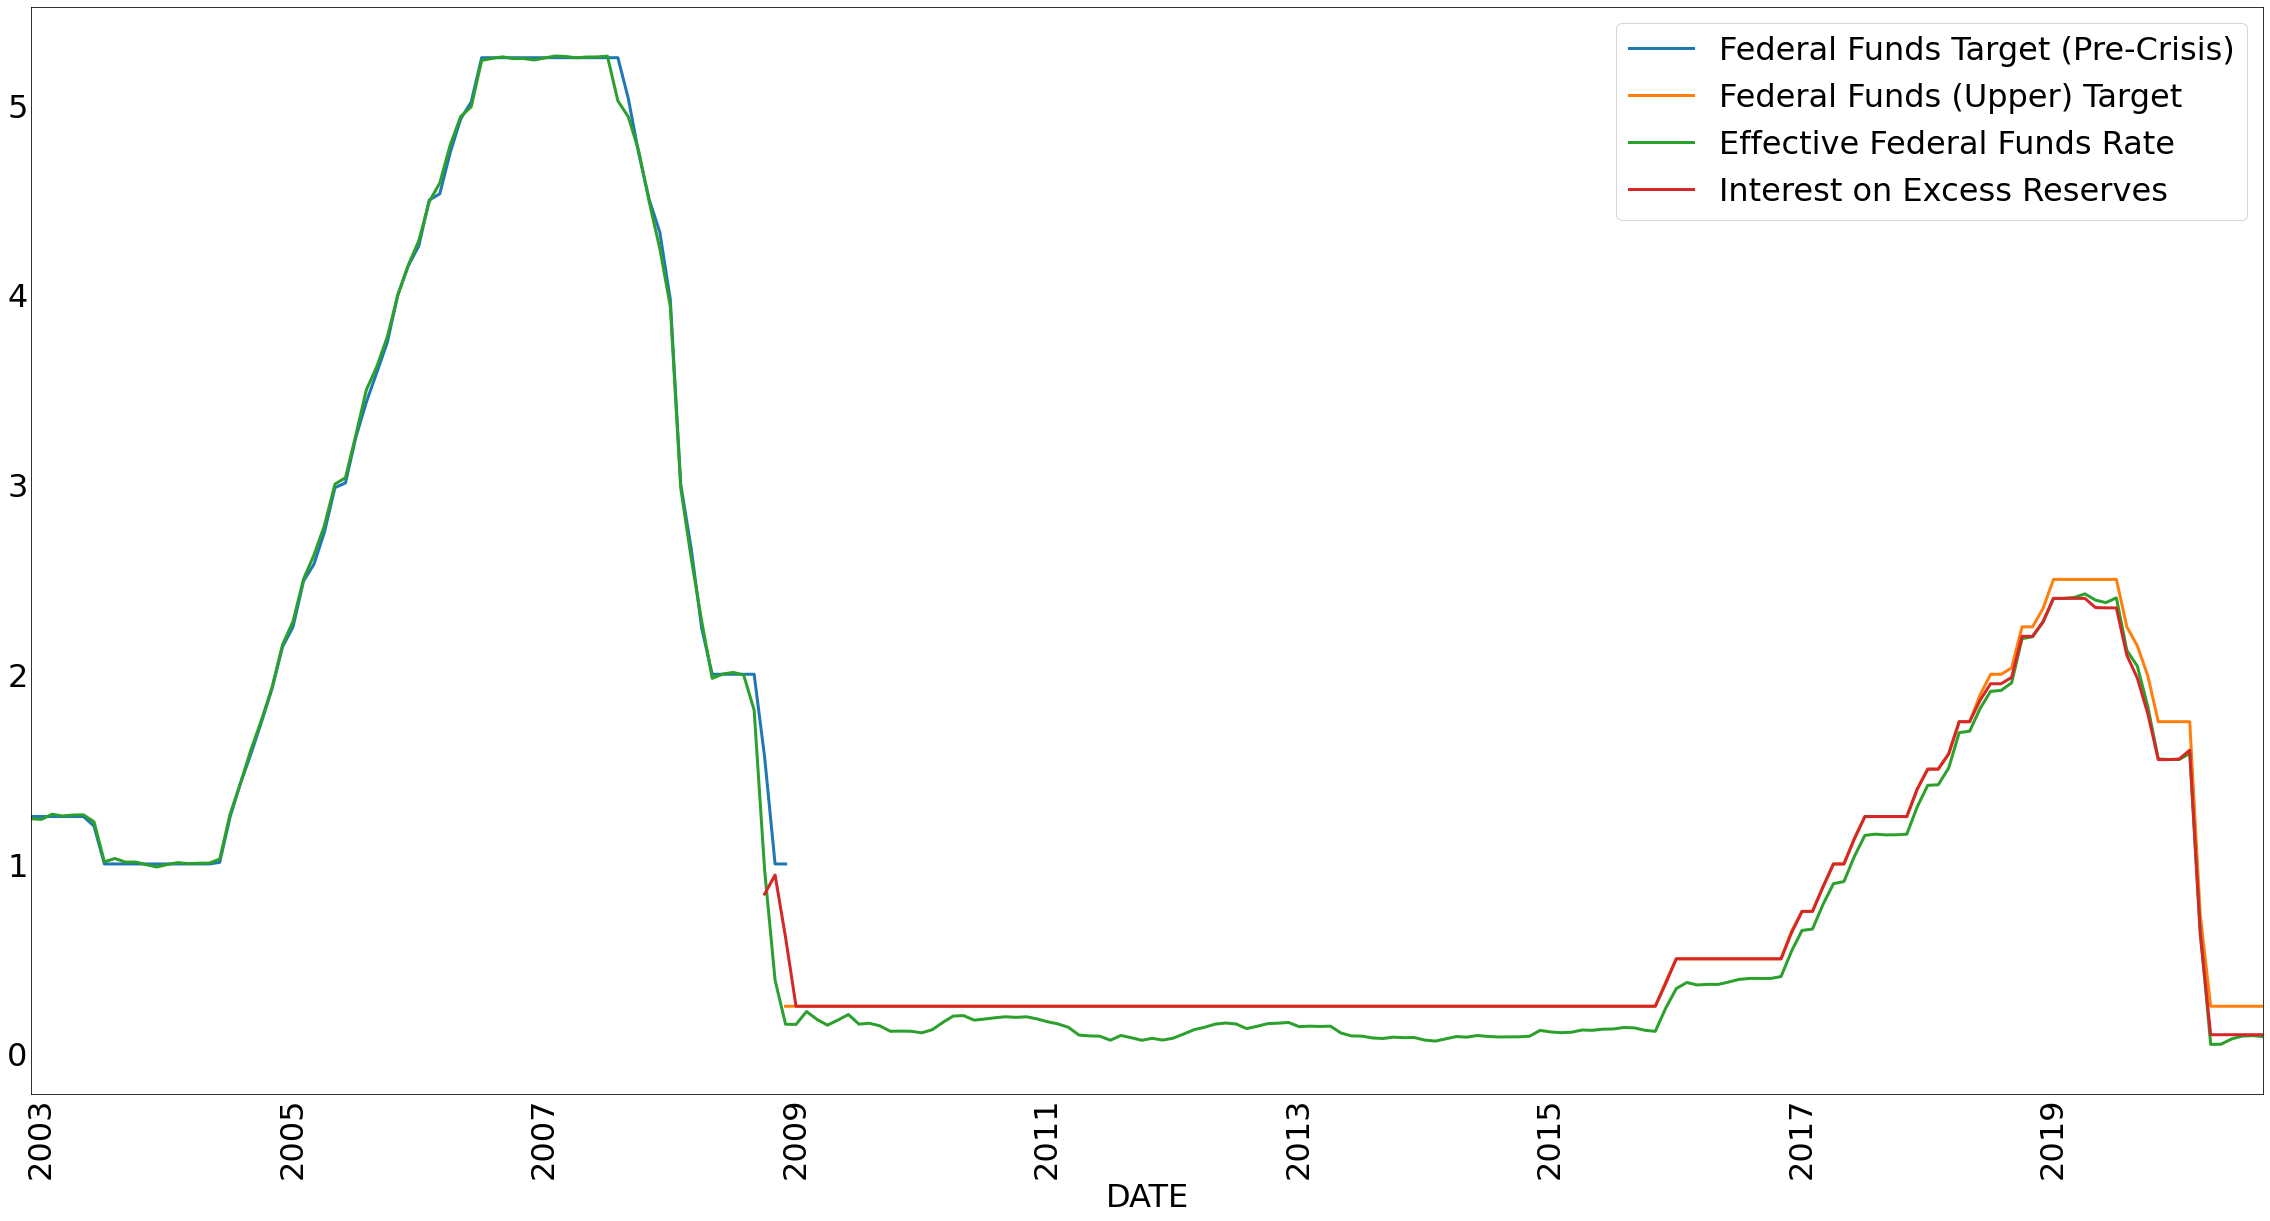

In [29]:
#fedProject.py
# . . . 
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]
plot_lines(data[interest_vars], linewidth = 3)
